## 23-03-2025

In [26]:
#  Visualize Association Rules (Network Graph)

import pandas as pd
data = [['milk', 'bread', 'butter'],
        ['beer', 'bread'],
        ['milk', 'bread', 'butter', 'beer'],
        ['bread', 'butter']]

df = pd.DataFrame({'Transaction': data})
df

,Transaction
0,"[milk, bread, butter]"
1,"[beer, bread]"
2,"[milk, bread, butter, beer]"
3,"[bread, butter]"


In [30]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [31]:
te=TransactionEncoder()

In [32]:
te_ary=te.fit(data).transform(data)
te_ary

array([[False,  True,  True,  True],
       [ True,  True, False, False],
       [ True,  True,  True,  True],
       [False,  True,  True, False]])

In [33]:
df_encoded=pd.DataFrame(te_ary,columns=te.columns_)
df_encoded

,beer,bread,butter,milk
0,False,True,True,True
1,True,True,False,False
2,True,True,True,True
3,False,True,True,False


In [34]:
frequent_itemset=apriori(df_encoded,min_support=0.5,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.50,(beer)
1,1.00,(bread)
2,0.75,(butter)
3,0.50,(milk)
4,0.50,"(bread, beer)"
5,0.75,"(bread, butter)"
6,0.50,"(bread, milk)"
7,0.50,"(milk, butter)"
8,0.50,"(milk, bread, butter)"


In [39]:
rules=association_rules(frequent_itemset,metric="lift",min_threshold=0.8,num_itemsets='int')
rules

C:\Users\91805\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bread),(beer),1.00,0.50,0.50,0.500000,1.000000,1.0,0.000,1.0,0.0,0.500000,0.000000,0.750000
1,(beer),(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000
2,(bread),(butter),1.00,0.75,0.75,0.750000,1.000000,1.0,0.000,1.0,0.0,0.750000,0.000000,0.875000
3,(butter),(bread),0.75,1.00,0.75,1.000000,1.000000,1.0,0.000,inf,0.0,0.750000,0.000000,0.875000
4,(bread),(milk),1.00,0.50,0.50,0.500000,1.000000,1.0,0.000,1.0,0.0,0.500000,0.000000,0.750000
5,(milk),(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000
6,(milk),(butter),0.50,0.75,0.50,1.000000,1.333333,1.0,0.125,inf,0.5,0.666667,1.000000,0.833333
7,(butter),(milk),0.75,0.50,0.50,0.666667,1.333333,1.0,0.125,1.5,1.0,0.666667,0.333333,0.833333
8,"(bread, milk)",(butter),0.50,0.75,0.50,1.000000,1.333333,1.0,0.125,inf,0.5,0.666667,1.000000,0.833333
9,"(milk, butter)",(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000


In [40]:
import networkx as nx
import matplotlib.pyplot as plt

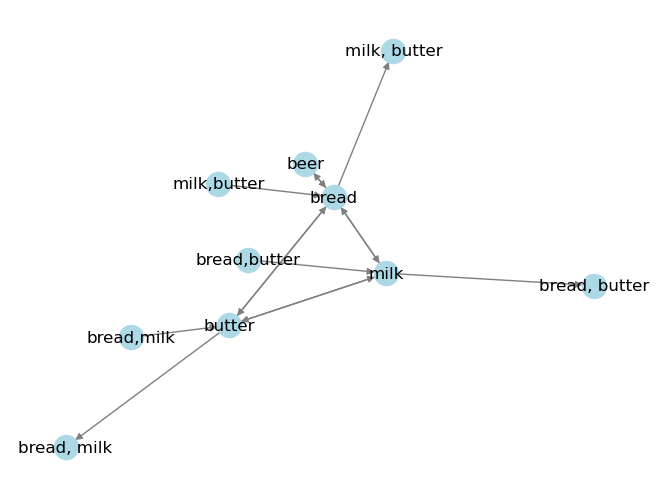

In [42]:
G=nx.DiGraph()
for _,row in rules.iterrows():
    G.add_edge(','.join(row['antecedents']),', '.join(row['consequents']),weight=row['lift'])

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()



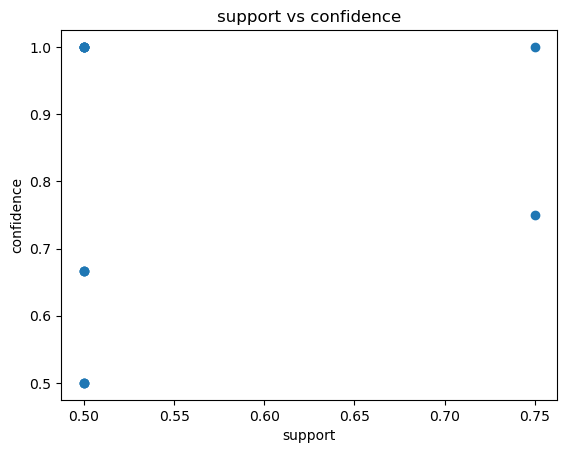

In [43]:
# Association Rules on Synthetic Data with Scatter Plot of Support vs Confidence
import random

items=['milk','bread','butter','jam','cheese','eggs']
data=[[random.choice(items) for _ in range(random.randint(2,4))] for _ in range(20)]

plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()

In [1]:
# Filter High-Lift Rules (>2) from Groceries Dataset

import pandas as pd
df=pd.read_csv('Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth,association_rules

In [3]:
basket=df.groupby(['Member_number','Date'])['itemDescription'].apply(list).reset_index()
basket

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


In [4]:
te=TransactionEncoder()

In [5]:
te_ary=te.fit(basket['itemDescription']).transform(basket['itemDescription'])
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
df_encoded=pd.DataFrame(te_ary,columns=te.columns_)
df_encoded

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())

    support       itemsets
0  0.157923   (whole milk)
1  0.085879       (yogurt)
2  0.060349      (sausage)
3  0.051728       (pastry)
4  0.018780  (salty snack)


In [13]:
rules = association_rules(frequent_itemsets, num_itemsets=len(df_encoded),metric="confidence", min_threshold=0.05)

In [14]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,1.0,-0.003707,0.956636,-0.260917,0.047776,-0.045329,0.096694
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,1.0,-0.003707,0.974663,-0.274587,0.047776,-0.025995,0.096694
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
8,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
9,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

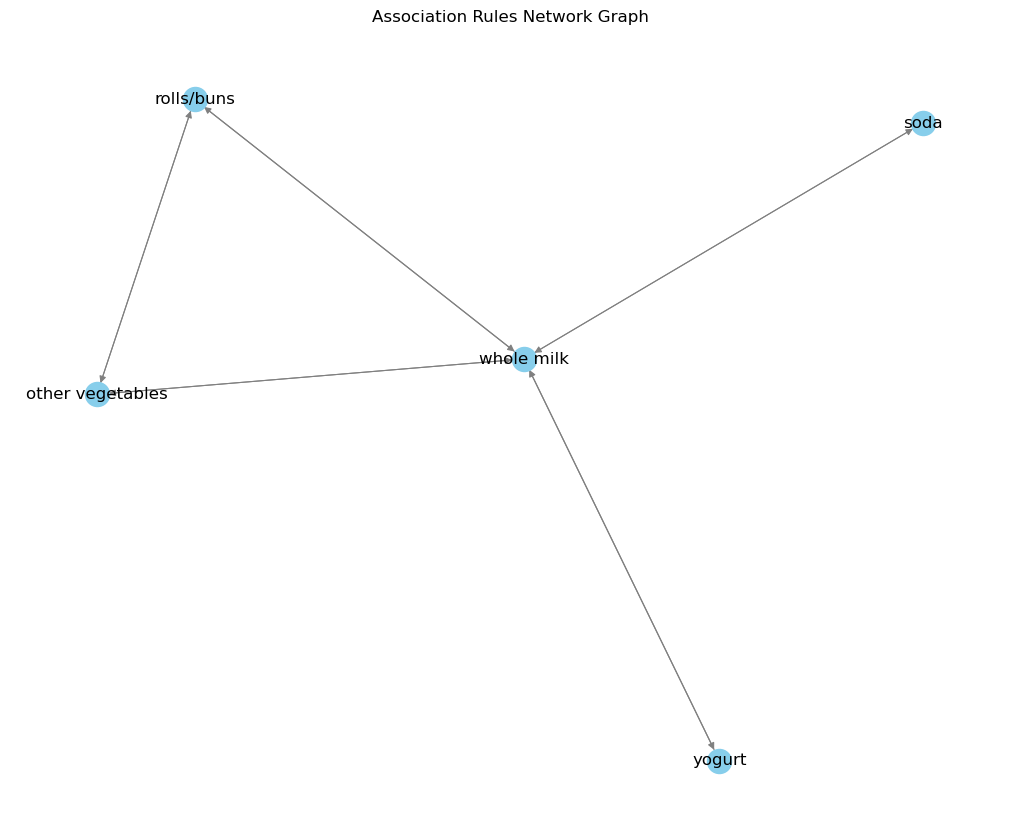

In [16]:
G = nx.DiGraph()

for _, row in rules.iterrows():
    G.add_edge(', '.join(list(row['antecedents'])), ', '.join(list(row['consequents'])), weight=row['lift'])

pos = nx.spring_layout(G, k=0.5, iterations=50)
edges = G.edges(data=True)
weights = [edata['weight'] for _, _, edata in edges]

plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', width=weights)
plt.title("Association Rules Network Graph")
plt.show()

In [18]:
rules = association_rules(frequent_itemsets, num_itemsets=len(df_encoded),metric="lift", min_threshold=0.05)

In [20]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,1.0,-0.003707,0.956636,-0.260917,0.047776,-0.045329,0.096694
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,1.0,-0.003707,0.974663,-0.274587,0.047776,-0.025995,0.096694
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
8,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
9,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730


In [22]:
high_lift_rules = rules[rules['lift'] > 2]

if not high_lift_rules.empty:
    high_lift_rules[['antecedents', 'consequents', 'lift']].plot(
        kind='bar', 
        x='antecedents', 
        y='lift',
        figsize=(10,5),
        color='skyblue'
    )
    plt.title('High Lift Rules')
    plt.ylabel('Lift')
    plt.show()
else:
    print("🚩 No rules found with lift > 2.")


🚩 No rules found with lift > 2.


In [23]:
high_lift_rules = rules[rules['lift'] > 1.1]


In [24]:
print(rules[['antecedents', 'consequents', 'lift']].sort_values(by='lift', ascending=False).head(10))


          antecedents         consequents      lift
0            (yogurt)        (whole milk)  0.822940
1        (whole milk)            (yogurt)  0.822940
5        (rolls/buns)        (whole milk)  0.804028
4        (whole milk)        (rolls/buns)  0.804028
6  (other vegetables)        (rolls/buns)  0.786154
7        (rolls/buns)  (other vegetables)  0.786154
9  (other vegetables)        (whole milk)  0.769430
8        (whole milk)  (other vegetables)  0.769430
2              (soda)        (whole milk)  0.758296
3        (whole milk)              (soda)  0.758296


# 24-03-2025

In [6]:
# Association Rules with Minimum Support and Lift Constraints
import pandas as pd
data = [['milk', 'bread', 'butter'],
        ['bread', 'jam'],
        ['milk', 'butter', 'eggs'],
        ['bread', 'butter', 'cheese'],
        ['jam', 'bread', 'milk']]


In [7]:
from mlxtend.preprocessing import TransactionEncoder

In [8]:
te=TransactionEncoder()

In [9]:
te_ary=te.fit(data).transform(data)
te_ary

array([[ True,  True, False, False, False,  True],
       [ True, False, False, False,  True, False],
       [False,  True, False,  True, False,  True],
       [ True,  True,  True, False, False, False],
       [ True, False, False, False,  True,  True]])

In [10]:
df=pd.DataFrame(te_ary,columns=te.columns_)

In [11]:
df

,bread,butter,cheese,eggs,jam,milk
0,True,True,False,False,False,True
1,True,False,False,False,True,False
2,False,True,False,True,False,True
3,True,True,True,False,False,False
4,True,False,False,False,True,True


In [12]:
from mlxtend.frequent_patterns import apriori, association_rules

In [13]:
frequent=apriori(df,min_support=0.3,use_colnames=True)
frequent

,support,itemsets
0,0.8,(bread)
1,0.6,(butter)
2,0.4,(jam)
3,0.6,(milk)
4,0.4,"(butter, bread)"
5,0.4,"(jam, bread)"
6,0.4,"(bread, milk)"
7,0.4,"(butter, milk)"


In [15]:
rules=association_rules(frequent,metric='confidence',min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(butter),(bread),0.6,0.8,0.4,0.666667,0.833333,1.0,-0.08,0.6,-0.333333,0.4,-0.666667,0.583333
1,(jam),(bread),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.5,1.000000,0.750000
2,(milk),(bread),0.6,0.8,0.4,0.666667,0.833333,1.0,-0.08,0.6,-0.333333,0.4,-0.666667,0.583333
3,(butter),(milk),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.250000,0.5,0.166667,0.666667
4,(milk),(butter),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.250000,0.5,0.166667,0.666667


In [16]:
rules=rules[rules['lift']>1.5]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [17]:
# Compare Apriori and FP-Growth

import pandas as pd
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'jam', 'honey'],
    ['milk', 'butter', 'eggs', 'bread'],
    ['bread', 'butter', 'cheese', 'milk'],
    ['jam', 'bread', 'milk'],
    ['milk', 'eggs', 'flour', 'sugar'],
    ['bread', 'butter', 'sugar', 'flour'],
    ['milk', 'jam', 'bread', 'butter'],
    ['eggs', 'flour', 'butter'],
    ['bread', 'butter', 'milk', 'eggs', 'jam'],
    ['bread', 'cheese', 'butter', 'milk'],
    ['bread', 'jam', 'honey', 'milk'],
    ['flour', 'butter', 'bread'],
    ['milk', 'eggs', 'bread'],
    ['bread', 'butter', 'milk', 'honey']
]


In [18]:
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth

In [19]:
start_ap=time.time()
start_ap

1742799400.7904613

In [20]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [21]:
te=TransactionEncoder()

In [22]:
te_ary=te.fit(data).transform(data)

In [23]:
df=pd.DataFrame(te_ary,columns=te.columns_)

In [25]:
frequent_ap=apriori(df,min_support=0.3,use_colnames=True)
frequent_ap

,support,itemsets
0,0.866667,(bread)
1,0.666667,(butter)
2,0.333333,(eggs)
3,0.333333,(jam)
4,0.733333,(milk)
5,0.600000,"(butter, bread)"
6,0.333333,"(jam, bread)"
7,0.666667,"(bread, milk)"
8,0.466667,"(butter, milk)"
9,0.466667,"(butter, bread, milk)"


In [26]:
end_ap=time.time()
end_ap

1742799678.0699124

In [27]:
# FP-Growth
start_fp=time.time()
start_fp

1742799718.7434356

In [28]:
frequent_fp=fpgrowth(df,min_support=0.3,use_colnames=True)
frequent_fp

,support,itemsets
0,0.866667,(bread)
1,0.733333,(milk)
2,0.666667,(butter)
3,0.333333,(jam)
4,0.333333,(eggs)
5,0.666667,"(bread, milk)"
6,0.600000,"(butter, bread)"
7,0.466667,"(butter, milk)"
8,0.466667,"(butter, bread, milk)"
9,0.333333,"(jam, bread)"


In [29]:
end_fp=time.time()
end_fp

1742799761.7021418

In [30]:
methods=['Apriori','FP_Growth']
methods

['Apriori', 'FP_Growth']

In [32]:
times=[end_ap-start_ap,end_fp-start_fp]
times

[277.2794511318207, 42.95870614051819]

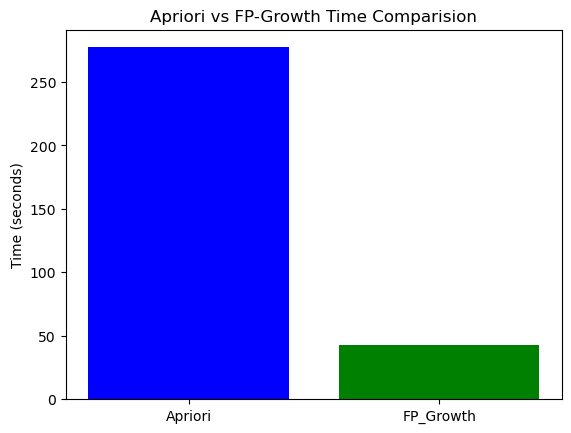

In [33]:
plt.bar(methods,times,color=['blue','green'])
plt.title('Apriori vs FP-Growth Time Comparision')
plt.ylabel('Time (seconds)')
plt.show()

In [37]:
print(len(frequent_ap))

10


In [38]:
print(len(frequent_fp))

10


In [39]:
# Heatmap of Support vs Lift

import pandas as pd
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'jam', 'honey'],
    ['milk', 'butter', 'eggs', 'bread'],
    ['bread', 'butter', 'cheese', 'milk'],
    ['jam', 'bread', 'milk'],
    ['milk', 'eggs', 'flour', 'sugar'],
    ['bread', 'butter', 'sugar', 'flour'],
    ['milk', 'jam', 'bread', 'butter'],
    ['eggs', 'flour', 'butter'],
    ['bread', 'butter', 'milk', 'eggs', 'jam'],
    ['bread', 'cheese', 'butter', 'milk'],
    ['bread', 'jam', 'honey', 'milk'],
    ['flour', 'butter', 'bread'],
    ['milk', 'eggs', 'bread'],
    ['bread', 'butter', 'milk', 'honey']
]


In [40]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [41]:
te=TransactionEncoder()

In [42]:
te_ary=te.fit(data).transform(data)

In [45]:
df=pd.DataFrame(te_ary,columns=te.columns_)

In [46]:
frequent=apriori(df,min_support=0.3,use_colnames=True)
frequent

,support,itemsets
0,0.866667,(bread)
1,0.666667,(butter)
2,0.333333,(eggs)
3,0.333333,(jam)
4,0.733333,(milk)
5,0.600000,"(butter, bread)"
6,0.333333,"(jam, bread)"
7,0.666667,"(bread, milk)"
8,0.466667,"(butter, milk)"
9,0.466667,"(butter, bread, milk)"


In [47]:
rules=association_rules(frequent,metric='confidence',min_threshold=0.5)

In [48]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(butter),(bread),0.666667,0.866667,0.600000,0.900000,1.038462,1.0,0.022222,1.333333,0.111111,0.642857,0.250000,0.796154
1,(bread),(butter),0.866667,0.666667,0.600000,0.692308,1.038462,1.0,0.022222,1.083333,0.277778,0.642857,0.076923,0.796154
2,(jam),(bread),0.333333,0.866667,0.333333,1.000000,1.153846,1.0,0.044444,inf,0.200000,0.384615,1.000000,0.692308
3,(bread),(milk),0.866667,0.733333,0.666667,0.769231,1.048951,1.0,0.031111,1.155556,0.350000,0.714286,0.134615,0.839161
4,(milk),(bread),0.733333,0.866667,0.666667,0.909091,1.048951,1.0,0.031111,1.466667,0.175000,0.714286,0.318182,0.839161
5,(butter),(milk),0.666667,0.733333,0.466667,0.700000,0.954545,1.0,-0.022222,0.888889,-0.125000,0.500000,-0.125000,0.668182
6,(milk),(butter),0.733333,0.666667,0.466667,0.636364,0.954545,1.0,-0.022222,0.916667,-0.151515,0.500000,-0.090909,0.668182
7,"(butter, bread)",(milk),0.600000,0.733333,0.466667,0.777778,1.060606,1.0,0.026667,1.200000,0.142857,0.538462,0.166667,0.707071
8,"(butter, milk)",(bread),0.466667,0.866667,0.466667,1.000000,1.153846,1.0,0.062222,inf,0.250000,0.538462,1.000000,0.769231
9,"(bread, milk)",(butter),0.666667,0.666667,0.466667,0.700000,1.050000,1.0,0.022222,1.111111,0.142857,0.538462,0.100000,0.700000


In [50]:
import seaborn as sns

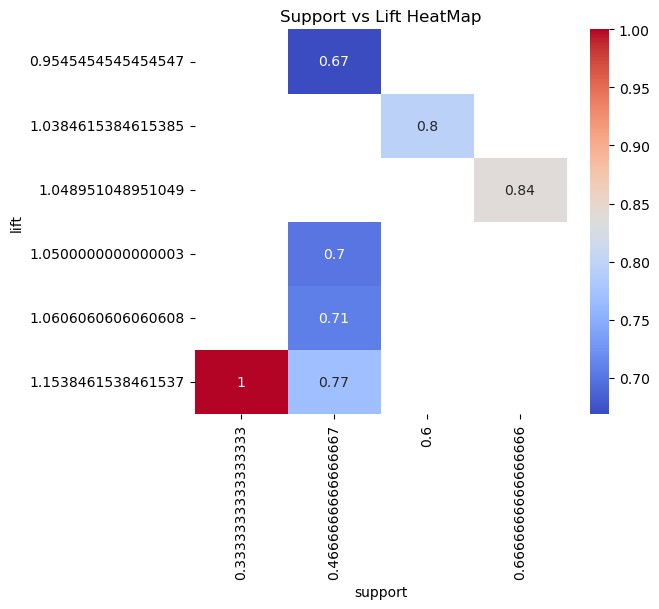

In [55]:
plt.figure(figsize=(6,5))
sns.heatmap(rules.pivot_table(index='lift',columns='support', values='confidence'), annot=True, cmap='coolwarm')
plt.title('Support vs Lift HeatMap')
plt.show()

In [56]:
# Movie Recommendation Using Association Rules

movies = [['Inception', 'Titanic', 'Avatar'],
          ['Titanic', 'Avatar'],
          ['Inception', 'Interstellar'],
          ['Titanic', 'Inception'],
          ['Avatar', 'Interstellar']]

In [57]:
import pandas  as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [58]:
te=TransactionEncoder()

In [59]:
te_ary=te.fit(movies).transform(movies)

In [60]:
df_movies=pd.DataFrame(te_ary,columns=te.columns_)

In [61]:
frequent=apriori(df_movies,min_support=0.3,use_colnames=True)
frequent

,support,itemsets
0,0.6,(Avatar)
1,0.6,(Inception)
2,0.4,(Interstellar)
3,0.6,(Titanic)
4,0.4,"(Avatar, Titanic)"
5,0.4,"(Inception, Titanic)"


In [62]:
rules=association_rules(frequent, metric='confidence', min_threshold=0.5)

In [63]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Avatar),(Titanic),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.25,0.5,0.166667,0.666667
1,(Titanic),(Avatar),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.25,0.5,0.166667,0.666667
2,(Inception),(Titanic),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.25,0.5,0.166667,0.666667
3,(Titanic),(Inception),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.2,0.25,0.5,0.166667,0.666667


# CLUSTERING

In [84]:
# K-Means Clustering on Customer Segmentation

import pandas as pd

data = {'Age': [25, 34, 22, 27, 45, 52, 46, 56, 55, 60],
        'Annual_Income': [25000, 48000, 20000, 27000, 60000, 52000, 49000, 80000, 75000, 85000]}
df = pd.DataFrame(data)
df

,Age,Annual_Income
0,25,25000
1,34,48000
2,22,20000
3,27,27000
4,45,60000
5,52,52000
6,46,49000
7,56,80000
8,55,75000
9,60,85000


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x=df[['Age']]
y=df['Annual_Income']

In [87]:
x

,Age
0,25
1,34
2,22
3,27
4,45
5,52
6,46
7,56
8,55
9,60


In [88]:
y

0    25000
1    48000
2    20000
3    27000
4    60000
5    52000
6    49000
7    80000
8    75000
9    85000
Name: Annual_Income, dtype: int64

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
x_train

,Age
5,52
0,25
7,56
2,22
9,60
4,45
3,27
6,46


In [91]:
x_test

,Age
8,55
1,34


In [92]:

y_train

5    52000
0    25000
7    80000
2    20000
9    85000
4    60000
3    27000
6    49000
Name: Annual_Income, dtype: int64

In [93]:
y_test

8    75000
1    48000
Name: Annual_Income, dtype: int64

In [94]:
from sklearn.cluster import KMeans

In [95]:
model=KMeans(n_clusters=5,random_state=42)

In [96]:
model.fit(x_train,y_train)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [100]:
df['cluster']=model.fit_predict(df)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [101]:
import matplotlib.pyplot as plt

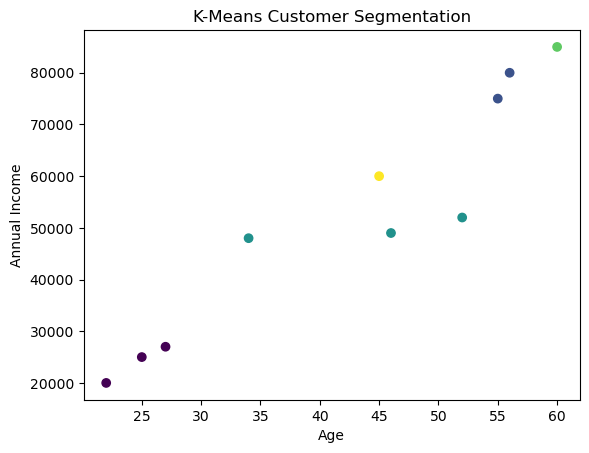

In [102]:
plt.scatter(df['Age'], df['Annual_Income'], c=df['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('K-Means Customer Segmentation')
plt.show()

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

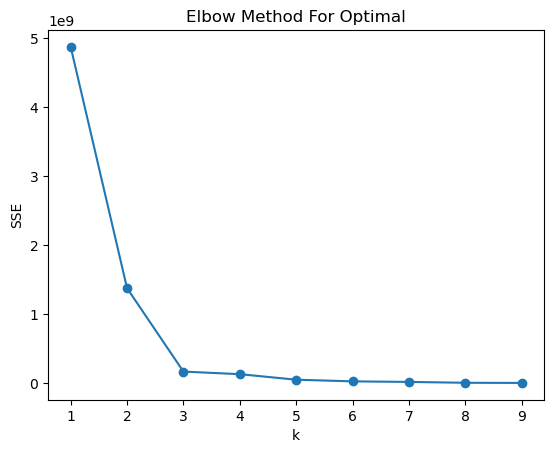

In [104]:
# Elbow Method for Optimal k

sse=[]
for k in range(1,10):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(df[['Age','Annual_Income']])
    sse.append(model.inertia_)

plt.plot(range(1,10),sse,marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal')
plt.show()

In [107]:
# Hierarchical Clustering + Dendrogram

from scipy.cluster.hierarchy import dendrogram,linkage

In [109]:
linked=linkage(df[['Age','Annual_Income']],method='ward')
linked

array([[1.00000000e+00, 6.00000000e+00, 1.00007200e+03, 2.00000000e+00],
       [0.00000000e+00, 3.00000000e+00, 2.00000100e+03, 2.00000000e+00],
       [5.00000000e+00, 1.00000000e+01, 4.04147564e+03, 3.00000000e+00],
       [7.00000000e+00, 8.00000000e+00, 5.00000010e+03, 2.00000000e+00],
       [2.00000000e+00, 1.10000000e+01, 6.92820477e+03, 3.00000000e+00],
       [9.00000000e+00, 1.30000000e+01, 8.66025560e+03, 3.00000000e+00],
       [4.00000000e+00, 1.20000000e+01, 1.26556971e+04, 4.00000000e+00],
       [1.50000000e+01, 1.60000000e+01, 5.13830210e+04, 7.00000000e+00],
       [1.40000000e+01, 1.70000000e+01, 8.22683922e+04, 1.00000000e+01]])

In [110]:
import matplotlib.pyplot as plt

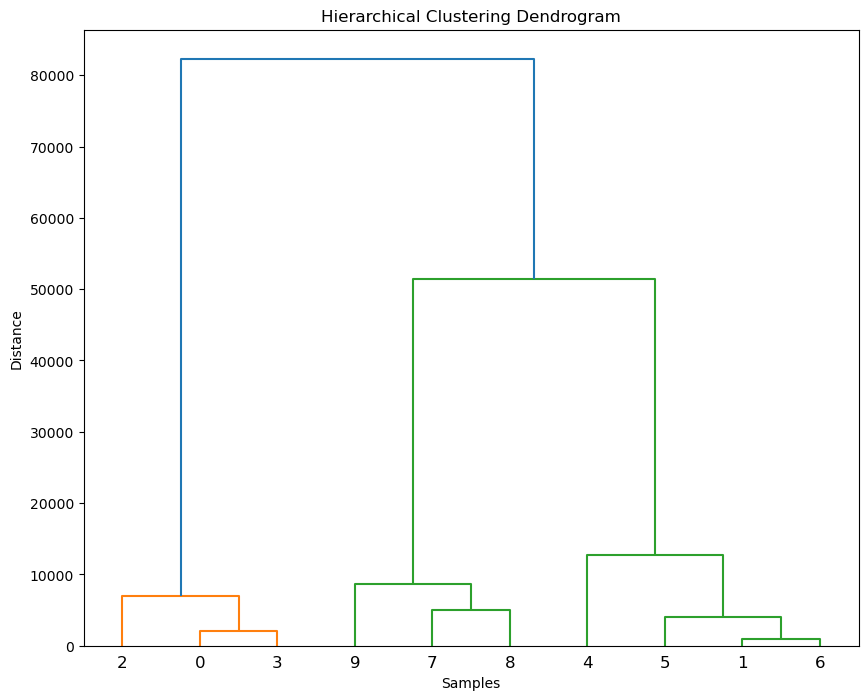

In [111]:
plt.figure(figsize=(10,8))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [113]:
# DBSCAN for Outlier Detection

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [114]:
scaler=StandardScaler()

In [116]:
scaled_data=scaler.fit_transform(df[['Age','Annual_Income']])
scaled_data

array([[-1.28501418, -1.22815693],
       [-0.61262304, -0.18580972],
       [-1.50914456, -1.45475415],
       [-1.13559393, -1.13751804],
       [ 0.20918835,  0.35802361],
       [ 0.73215924, -0.00453194],
       [ 0.28389848, -0.14049028],
       [ 1.03099975,  1.26441249],
       [ 0.95628962,  1.03781527],
       [ 1.32984026,  1.49100971]])

In [117]:
dbscan=DBSCAN(eps=1,min_samples=2,metric='euclidean')

In [118]:
df['DBSCAN']=dbscan.fit_predict(scaled_data)

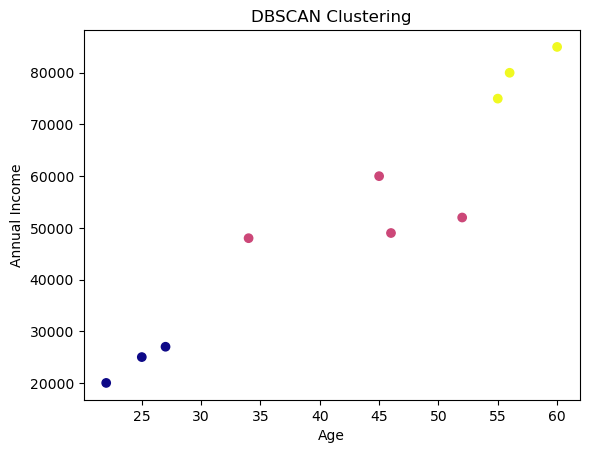

In [119]:
plt.scatter(df['Age'],df['Annual_Income'],c=df['DBSCAN'],cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [146]:
# K-Means Clustering on Iris Dataset

df=pd.read_csv(r"C:\Users\91805\Downloads\Data science\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [147]:
df['species']=df['species'].replace({'setosa':'1','versicolor':'2','virginica':'3'})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [148]:
from sklearn.cluster import KMeans

In [149]:
model=KMeans(n_clusters=3,random_state=42)

In [150]:
df['cluster']=model.fit_predict(df)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [151]:
import matplotlib.pyplot as plt

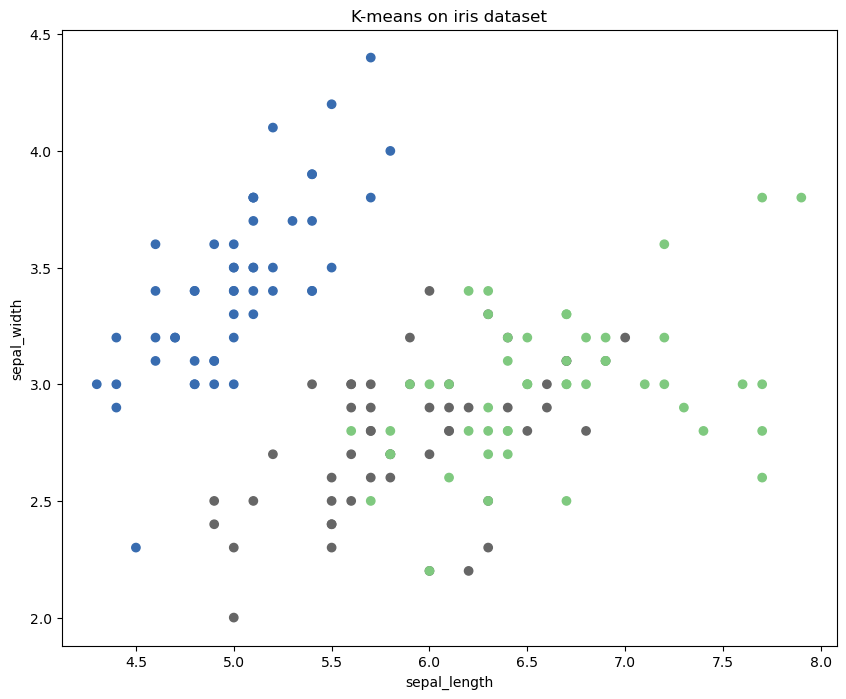

In [152]:
plt.figure(figsize=(10,8))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df['cluster'],cmap='Accent')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('K-means on iris dataset')
plt.show()

In [1]:
# Clustering Customers Based on Spending Behavior

import pandas as pd

data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Spending_Score': [90, 85, 40, 30, 80, 75, 20, 10, 70, 95],
    'Annual_Income': [50000, 55000, 30000, 25000, 60000, 62000, 20000, 15000, 70000, 80000]
}
df = pd.DataFrame(data)
df

,CustomerID,Spending_Score,Annual_Income
0,1,90,50000
1,2,85,55000
2,3,40,30000
3,4,30,25000
4,5,80,60000
5,6,75,62000
6,7,20,20000
7,8,10,15000
8,9,70,70000
9,10,95,80000


In [3]:
from sklearn.cluster import KMeans

In [4]:
model=KMeans(n_clusters=3,random_state=42)

In [5]:
df['cluster']=model.fit_predict(df[['Spending_Score', 'Annual_Income']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
df

,CustomerID,Spending_Score,Annual_Income,cluster
0,1,90,50000,2
1,2,85,55000,2
2,3,40,30000,0
3,4,30,25000,0
4,5,80,60000,2
5,6,75,62000,2
6,7,20,20000,0
7,8,10,15000,0
8,9,70,70000,1
9,10,95,80000,1


In [7]:
import matplotlib.pyplot as plt

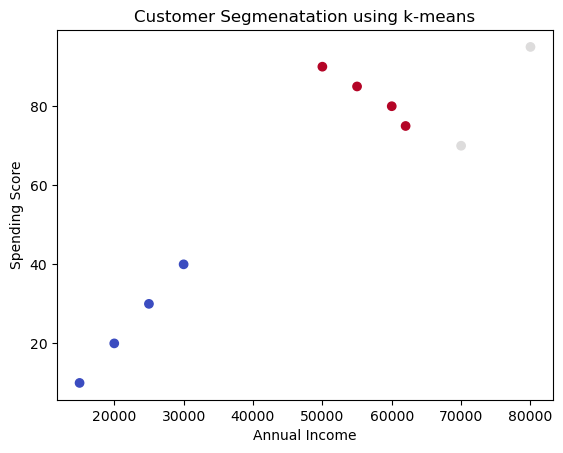

In [10]:
plt.scatter(df['Annual_Income'],df['Spending_Score'],c=df['cluster'],cmap='coolwarm')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmenatation using k-means')
plt.show()

In [11]:
# Gaussian Mixture Model (GMM) Clustering on Sales Data

import numpy as np

np.random.seed(42)
sales_data = {
    'Monthly_Sales': np.random.randint(100, 500, 20),
    'Product_Cost': np.random.randint(20, 100, 20)
}
df = pd.DataFrame(sales_data)
df

,Monthly_Sales,Product_Cost
0,202,49
1,448,57
2,370,21
3,206,83
4,171,79
5,288,40
6,120,52
7,202,95
8,221,77
9,314,41


In [12]:
from sklearn.mixture import GaussianMixture

In [13]:
gm=GaussianMixture(n_components=1,random_state=42)

In [14]:
df['cluster']=gm.fit_predict(df[['Monthly_Sales','Product_Cost']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
import matplotlib.pyplot as plt

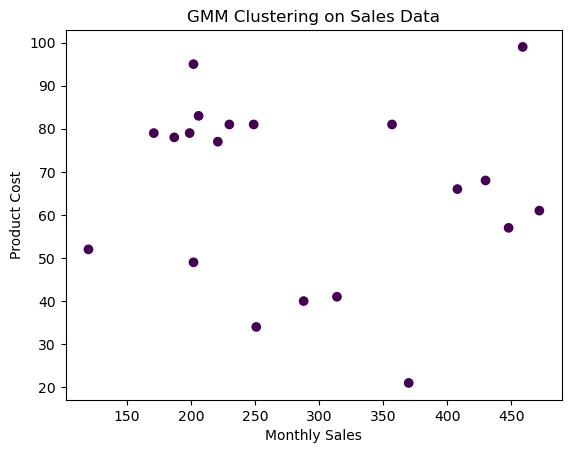

In [17]:
plt.scatter(df['Monthly_Sales'], df['Product_Cost'], c=df['cluster'], cmap='viridis')
plt.xlabel('Monthly Sales')
plt.ylabel('Product Cost')
plt.title('GMM Clustering on Sales Data')
plt.show()

In [18]:
# Clustering Countries Based on Population Growth

import pandas as pd
data = {
    'Country': ['USA', 'China', 'India', 'Brazil', 'Germany', 'UK', 'France', 'Canada', 'Japan', 'Russia'],
    'Population_Growth_Rate': [0.7, 0.4, 1.2, 0.9, 0.2, 0.3, 0.4, 0.6, -0.2, -0.1]
}
df = pd.DataFrame(data)
df

,Country,Population_Growth_Rate
0,USA,0.7
1,China,0.4
2,India,1.2
3,Brazil,0.9
4,Germany,0.2
5,UK,0.3
6,France,0.4
7,Canada,0.6
8,Japan,-0.2
9,Russia,-0.1


In [19]:
from sklearn.cluster import KMeans

In [20]:
df['cluster']=model.fit_predict(df[['Population_Growth_Rate']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
df

,Country,Population_Growth_Rate,cluster
0,USA,0.7,0
1,China,0.4,2
2,India,1.2,0
3,Brazil,0.9,0
4,Germany,0.2,2
5,UK,0.3,2
6,France,0.4,2
7,Canada,0.6,2
8,Japan,-0.2,1
9,Russia,-0.1,1


In [21]:
import matplotlib.pyplot as plt

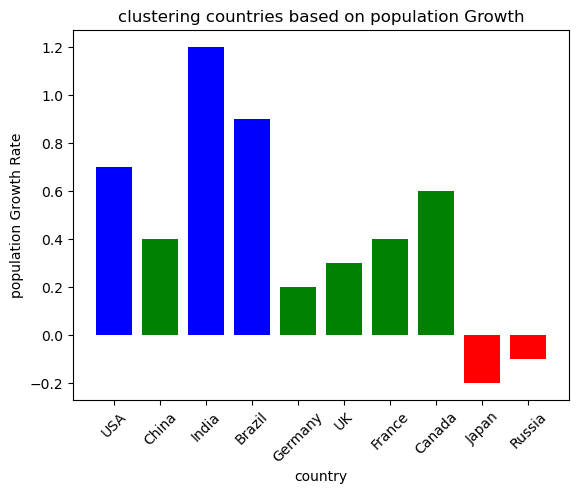

In [24]:
plt.bar(df['Country'],df['Population_Growth_Rate'],color=df['cluster'].map({0:'blue',1:'red',2:'green'}))
plt.xticks(rotation=45)
plt.xlabel('country')
plt.ylabel('population Growth Rate')
plt.title('clustering countries based on population Growth')
plt.show()

In [25]:
# DBSCAN for Anomaly Detection in Website Traffic

import pandas as pd
data = {
    'Visitors': [100, 105, 110, 500, 120, 130, 135, 140, 800, 150],
    'Bounce_Rate': [50, 55, 52, 90, 50, 45, 40, 42, 95, 38]
}
df = pd.DataFrame(data)
df

,Visitors,Bounce_Rate
0,100,50
1,105,55
2,110,52
3,500,90
4,120,50
5,130,45
6,135,40
7,140,42
8,800,95
9,150,38


In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
df_sclaed=scaler.fit_transform(df)

In [30]:
df_sclaed

array([[-0.58256052, -0.29785833],
       [-0.55998065, -0.03657909],
       [-0.53740079, -0.19334664],
       [ 1.22382869,  1.79237559],
       [-0.49224106, -0.29785833],
       [-0.44708133, -0.55913757],
       [-0.42450146, -0.82041681],
       [-0.4019216 , -0.71590512],
       [ 2.57862059,  2.05365483],
       [-0.35676187, -0.92492851]])

In [31]:
dbscan=DBSCAN(eps=1,min_samples=2)

In [34]:
df['cluster']=dbscan.fit_predict(df_sclaed)

In [35]:
df

,Visitors,Bounce_Rate,cluster
0,100,50,0
1,105,55,0
2,110,52,0
3,500,90,-1
4,120,50,0
5,130,45,0
6,135,40,0
7,140,42,0
8,800,95,-1
9,150,38,0


In [36]:
import matplotlib.pyplot as plt

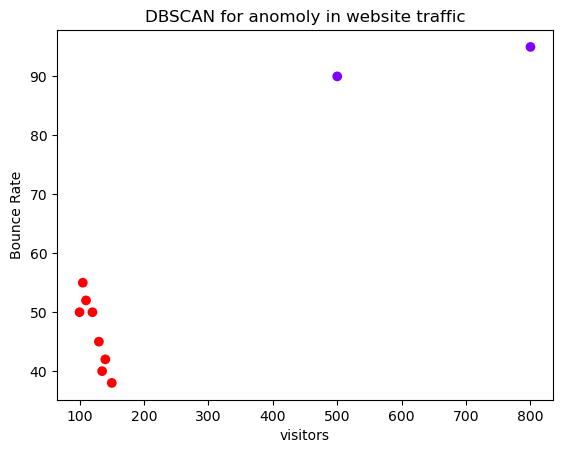

In [37]:
plt.scatter(df['Visitors'],df['Bounce_Rate'],c=df['cluster'],cmap='rainbow')
plt.xlabel('visitors')
plt.ylabel('Bounce Rate')
plt.title('DBSCAN for anomoly in website traffic')
plt.show()

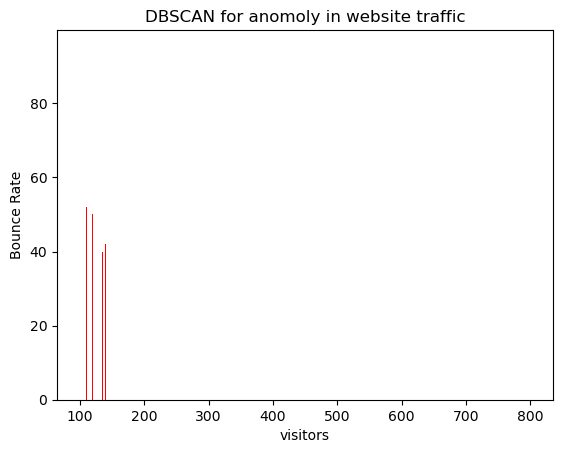

In [40]:
plt.bar(df['Visitors'],df['Bounce_Rate'],color=df['cluster'].map({-1:'blue',0:'red'}))
plt.xlabel('visitors')
plt.ylabel('Bounce Rate')
plt.title('DBSCAN for anomoly in website traffic')
plt.show()

In [41]:
#  Clustering Cities Based on Temperature and Rainfall

import pandas as pd
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'San Diego', 'Dallas', 'San Antonio', 'Seattle', 'Miami'],
    'Average_Temperature': [12, 18, 10, 22, 25, 19, 23, 26, 11, 27],
    'Rainfall': [1200, 380, 900, 1400, 250, 300, 1000, 1100, 1500, 1700]
}
df = pd.DataFrame(data)
df

,City,Average_Temperature,Rainfall
0,New York,12,1200
1,Los Angeles,18,380
2,Chicago,10,900
3,Houston,22,1400
4,Phoenix,25,250
5,San Diego,19,300
6,Dallas,23,1000
7,San Antonio,26,1100
8,Seattle,11,1500
9,Miami,27,1700


In [42]:
from sklearn.cluster import KMeans

In [43]:
model=KMeans(n_clusters=3,random_state=42)

In [44]:
df['cluster']=model.fit_predict(df[['Average_Temperature','Rainfall']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
df

,City,Average_Temperature,Rainfall,cluster
0,New York,12,1200,2
1,Los Angeles,18,380,1
2,Chicago,10,900,2
3,Houston,22,1400,0
4,Phoenix,25,250,1
5,San Diego,19,300,1
6,Dallas,23,1000,2
7,San Antonio,26,1100,2
8,Seattle,11,1500,0
9,Miami,27,1700,0


In [46]:
import matplotlib.pyplot as plt

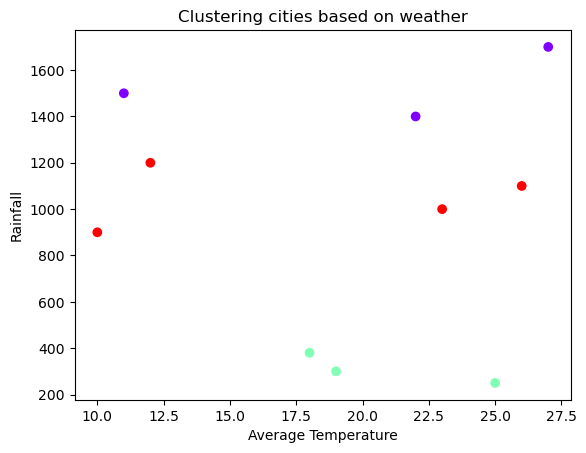

In [48]:
plt.scatter(df['Average_Temperature'],df['Rainfall'],c=df['cluster'],cmap='rainbow')
plt.xlabel('Average Temperature')
plt.ylabel('Rainfall')
plt.title('Clustering cities based on weather')
plt.show()

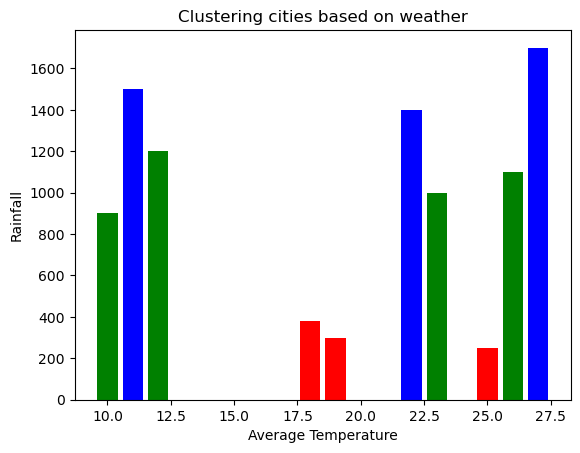

In [51]:
plt.bar(df['Average_Temperature'],df['Rainfall'],color=df['cluster'].map({0:'blue',1:'red',2:'green'}))
plt.xlabel('Average Temperature')
plt.ylabel('Rainfall')
plt.title('Clustering cities based on weather')
plt.show()

In [52]:
# Clustering Movies Based on Ratings and Popularity

import pandas as pd

data = {
    'Movie': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E', 'Movie F', 'Movie G', 'Movie H', 'Movie I', 'Movie J'],
    'Avg_Rating': [4.5, 3.2, 4.8, 2.5, 3.8, 4.2, 2.9, 3.5, 4.9, 3.0],
    'Num_Reviews': [1000, 500, 1200, 300, 800, 1100, 400, 700, 1500, 600]
}
df = pd.DataFrame(data)
df

,Movie,Avg_Rating,Num_Reviews
0,Movie A,4.5,1000
1,Movie B,3.2,500
2,Movie C,4.8,1200
3,Movie D,2.5,300
4,Movie E,3.8,800
5,Movie F,4.2,1100
6,Movie G,2.9,400
7,Movie H,3.5,700
8,Movie I,4.9,1500
9,Movie J,3.0,600


In [53]:
from sklearn.cluster import KMeans

In [54]:
model=KMeans(n_clusters=3,random_state=42)

In [55]:
df['cluster']=model.fit_predict(df[['Avg_Rating','Num_Reviews']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [56]:
df

,Movie,Avg_Rating,Num_Reviews,cluster
0,Movie A,4.5,1000,2
1,Movie B,3.2,500,0
2,Movie C,4.8,1200,2
3,Movie D,2.5,300,0
4,Movie E,3.8,800,2
5,Movie F,4.2,1100,2
6,Movie G,2.9,400,0
7,Movie H,3.5,700,0
8,Movie I,4.9,1500,1
9,Movie J,3.0,600,0


In [57]:
import matplotlib.pyplot as plt

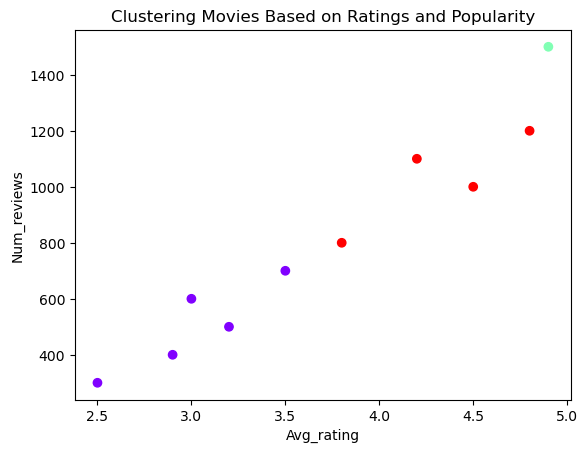

In [60]:
plt.scatter(df['Avg_Rating'],df['Num_Reviews'],c=df['cluster'],cmap='rainbow')
plt.xlabel('Avg_rating')
plt.ylabel('Num_reviews')
plt.title('Clustering Movies Based on Ratings and Popularity')
plt.show()

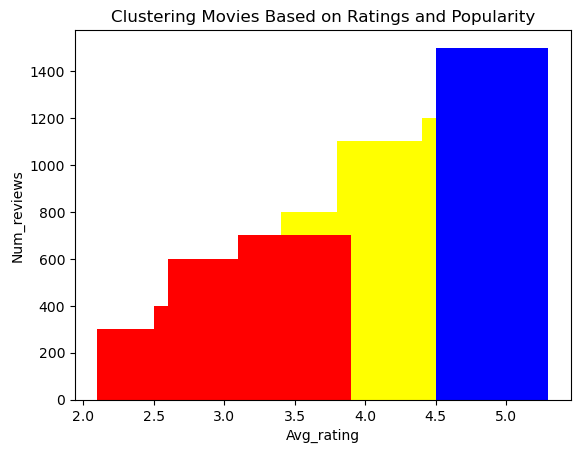

In [61]:
plt.bar(df['Avg_Rating'],df['Num_Reviews'],color=df['cluster'].map({0:'red',1:'blue',2:'yellow'}))
plt.xlabel('Avg_rating')
plt.ylabel('Num_reviews')
plt.title('Clustering Movies Based on Ratings and Popularity')
plt.show()

In [62]:
# Clustering Bank Customers Based on Transactions
import numpy as np

np.random.seed(42)
data = {
    'CustomerID': np.arange(1, 21),
    'Avg_Transaction_Amount': np.random.randint(500, 5000, 20),
    'Num_Transactions': np.random.randint(10, 200, 20)
}
df = pd.DataFrame(data)
df

,CustomerID,Avg_Transaction_Amount,Num_Transactions
0,1,1360,179
1,2,4272,197
2,3,3592,24
3,4,966,199
4,5,4926,199
5,6,3944,184
6,7,3671,199
7,8,3419,60
8,9,630,117
9,10,2185,64


In [64]:
from sklearn.cluster import KMeans

In [65]:
model=KMeans(n_clusters=3,random_state=42)

In [67]:
df['cluster']=model.fit_predict(df[['Avg_Transaction_Amount','Num_Transactions']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
df

,CustomerID,Avg_Transaction_Amount,Num_Transactions,cluster
0,1,1360,179,1
1,2,4272,197,2
2,3,3592,24,0
3,4,966,199,1
4,5,4926,199,2
5,6,3944,184,2
6,7,3671,199,0
7,8,3419,60,0
8,9,630,117,1
9,10,2185,64,1


In [69]:
import matplotlib.pyplot as plt

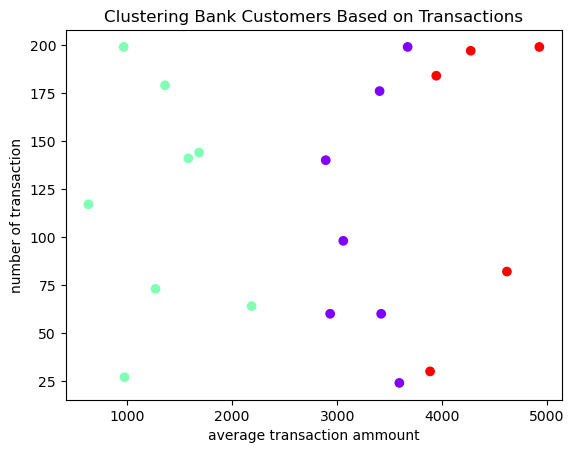

In [70]:
plt.scatter(df['Avg_Transaction_Amount'],df['Num_Transactions'],c=df['cluster'],cmap='rainbow')
plt.xlabel('average transaction ammount')
plt.ylabel('number of transaction')
plt.title('Clustering Bank Customers Based on Transactions')
plt.show()

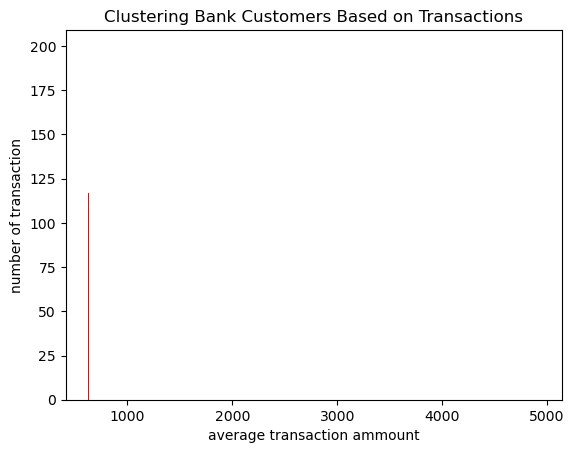

In [71]:
plt.bar(df['Avg_Transaction_Amount'],df['Num_Transactions'],color=df['cluster'].map({0:'blue',1:'red',2:'yellow'}))
plt.xlabel('average transaction ammount')
plt.ylabel('number of transaction')
plt.title('Clustering Bank Customers Based on Transactions')
plt.show()

In [72]:
# Clustering IoT Sensor Data for Fault Detection

import pandas as pd
data = {
    'SensorID': np.arange(1, 11),
    'Temperature': [30, 32, 45, 28, 50, 48, 33, 40, 55, 60],
    'Vibration': [1.2, 1.1, 3.5, 0.8, 4.2, 3.9, 1.3, 2.5, 5.0, 5.8]
}
df = pd.DataFrame(data)
df

,SensorID,Temperature,Vibration
0,1,30,1.2
1,2,32,1.1
2,3,45,3.5
3,4,28,0.8
4,5,50,4.2
5,6,48,3.9
6,7,33,1.3
7,8,40,2.5
8,9,55,5.0
9,10,60,5.8


In [73]:
from sklearn.cluster import KMeans

In [74]:
model=KMeans(n_clusters=2,random_state=42)

In [75]:
df['cluster']=model.fit_predict(df[['Temperature','Vibration']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [76]:
df

,SensorID,Temperature,Vibration,cluster
0,1,30,1.2,0
1,2,32,1.1,0
2,3,45,3.5,1
3,4,28,0.8,0
4,5,50,4.2,1
5,6,48,3.9,1
6,7,33,1.3,0
7,8,40,2.5,0
8,9,55,5.0,1
9,10,60,5.8,1


In [77]:
import matplotlib.pyplot as plt

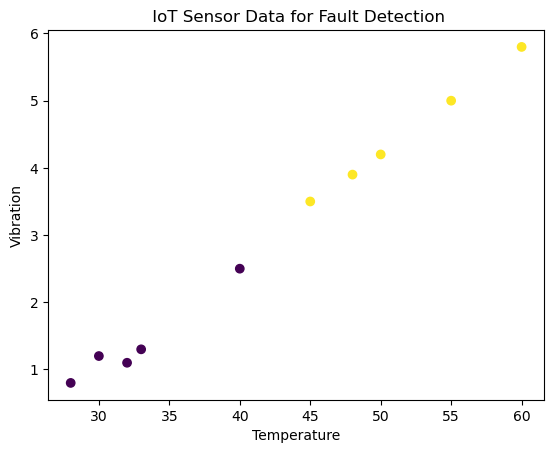

In [78]:
plt.scatter(df['Temperature'],df['Vibration'],c=df['cluster'],cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.title(' IoT Sensor Data for Fault Detection')
plt.show()

In [79]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [80]:
scaler=StandardScaler()

In [82]:
df_scaled=scaler.fit_transform(df[['Temperature','Vibration']])

In [83]:
df_scaled

array([[-1.13983682, -1.01377823],
       [-0.95143404, -1.07237813],
       [ 0.27318403,  0.33401942],
       [-1.3282396 , -1.24817782],
       [ 0.74419098,  0.7442187 ],
       [ 0.5557882 ,  0.56841901],
       [-0.85723265, -0.95517833],
       [-0.19782292, -0.25197956],
       [ 1.21519793,  1.21301788],
       [ 1.68620488,  1.68181706]])

In [84]:
dbscan=DBSCAN(eps=1,min_samples=3)

In [85]:
df['cluster']=dbscan.fit_predict(df_scaled)

In [86]:
import matplotlib.pyplot as plt

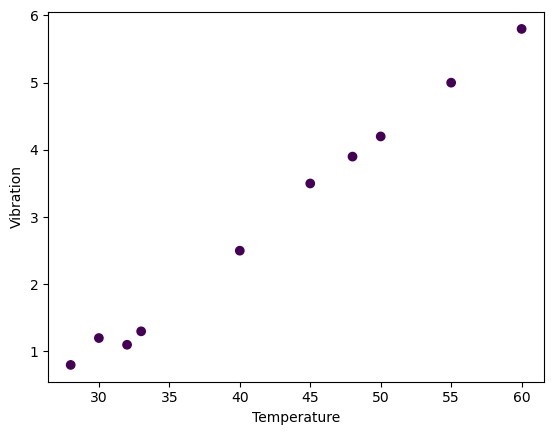

In [88]:
plt.scatter(df['Temperature'],df['Vibration'],c=df['cluster'],cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.show()

In [89]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [90]:
linked=linkage(df_scaled,method='ward')

In [91]:
linked

array([[ 1.        ,  6.        ,  0.1503652 ,  2.        ],
       [ 4.        ,  5.        ,  0.25768419,  2.        ],
       [ 0.        , 10.        ,  0.27193599,  3.        ],
       [ 3.        , 12.        ,  0.51124532,  4.        ],
       [ 2.        , 11.        ,  0.5725491 ,  3.        ],
       [ 8.        ,  9.        ,  0.66454512,  2.        ],
       [ 7.        , 14.        ,  1.32078012,  4.        ],
       [15.        , 16.        ,  2.5468414 ,  6.        ],
       [13.        , 17.        ,  5.52950036, 10.        ]])

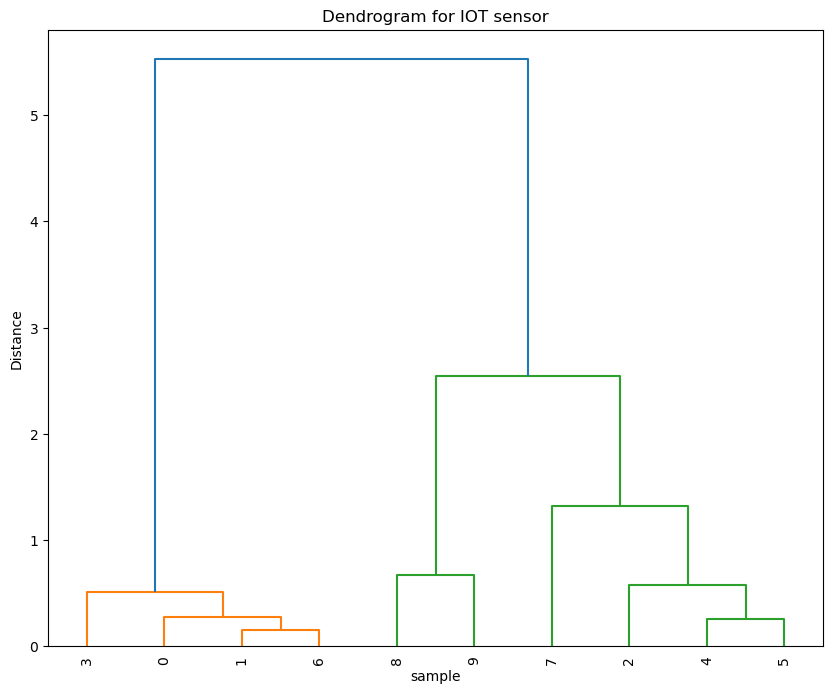

In [92]:
plt.figure(figsize=(10,8))
dendrogram(linked,labels=df.index,leaf_rotation=90,leaf_font_size=10)
plt.title('Dendrogram for IOT sensor')
plt.xlabel('sample')
plt.ylabel('Distance')
plt.show()

In [93]:
# Clustering Twitter Users Based on Activity

data = {
    'UserID': np.arange(1, 11),
    'Tweets_Per_Day': [5, 8, 15, 3, 20, 18, 7, 12, 25, 30],
    'Followers': [200, 500, 1000, 100, 2500, 1800, 300, 1200, 5000, 6000]
}
df = pd.DataFrame(data)
df

,UserID,Tweets_Per_Day,Followers
0,1,5,200
1,2,8,500
2,3,15,1000
3,4,3,100
4,5,20,2500
5,6,18,1800
6,7,7,300
7,8,12,1200
8,9,25,5000
9,10,30,6000


In [94]:
from sklearn.cluster import KMeans

In [95]:
model=KMeans(n_clusters=3,random_state=42)

In [97]:
df['cluster']=model.fit_predict(df[['Tweets_Per_Day','Followers']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [98]:
df

,UserID,Tweets_Per_Day,Followers,cluster
0,1,5,200,0
1,2,8,500,0
2,3,15,1000,0
3,4,3,100,0
4,5,20,2500,2
5,6,18,1800,2
6,7,7,300,0
7,8,12,1200,0
8,9,25,5000,1
9,10,30,6000,1


In [99]:
import matplotlib.pyplot as plt

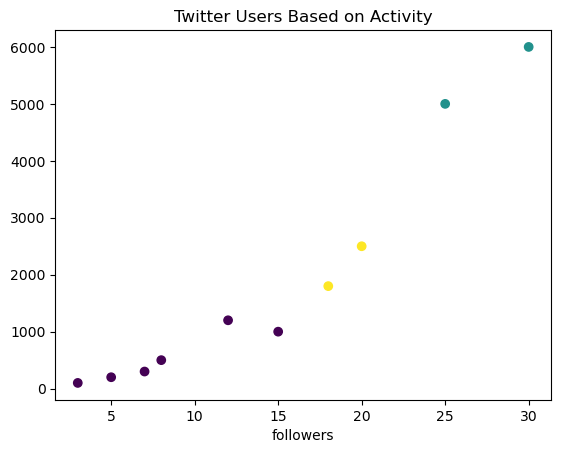

In [100]:
plt.scatter(df['Tweets_Per_Day'],df['Followers'],c=df['cluster'],cmap='viridis')
plt.xlabel('tewwts per day')
plt.xlabel('followers')
plt.title('Twitter Users Based on Activity')
plt.show()

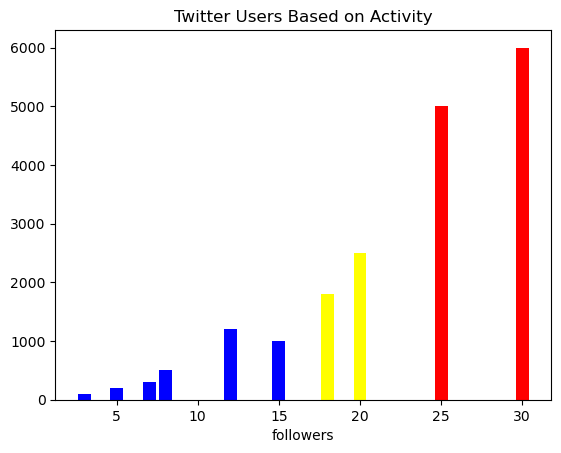

In [101]:
plt.bar(df['Tweets_Per_Day'],df['Followers'],color=df['cluster'].map({0:'blue',1:'red',2:'yellow'}))
plt.xlabel('tewwts per day')
plt.xlabel('followers')
plt.title('Twitter Users Based on Activity')
plt.show()

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler=StandardScaler()

In [104]:
df_scaled=scaler.fit_transform(df[['Tweets_Per_Day','Followers']])

In [105]:
df_scaled

array([[-1.09593941, -0.84356389],
       [-0.74241057, -0.69111259],
       [ 0.08249006, -0.43702708],
       [-1.3316253 , -0.89438099],
       [ 0.6717048 ,  0.32522945],
       [ 0.4360189 , -0.03049026],
       [-0.86025351, -0.79274679],
       [-0.27103878, -0.33539287],
       [ 1.26091953,  1.595657  ],
       [ 1.85013427,  2.10382802]])

In [106]:
from sklearn.cluster import DBSCAN

In [107]:
dbscan=DBSCAN(eps=1,min_samples=5)

In [108]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [109]:
liked=linkage(df_scaled,method='ward')

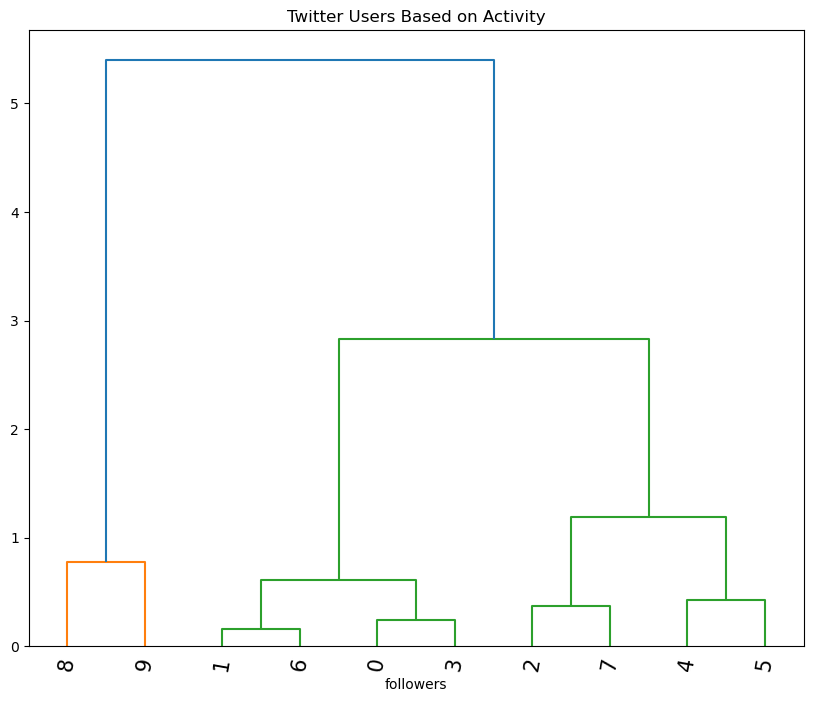

In [110]:
plt.figure(figsize=(10,8))
dendrogram(liked,labels=df.index,leaf_rotation=80,leaf_font_size=15)
plt.xlabel('tewwts per day')
plt.xlabel('followers')
plt.title('Twitter Users Based on Activity')
plt.show()

In [111]:
# Clustering Products Based on Price and Demand

data = {
    'Product': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F', 'Product G', 'Product H', 'Product I', 'Product J'],
    'Price': [50, 20, 75, 30, 100, 80, 25, 60, 110, 90],
    'Demand': [500, 1500, 400, 1200, 200, 300, 1400, 600, 100, 250]
}
df = pd.DataFrame(data)
df

,Product,Price,Demand
0,Product A,50,500
1,Product B,20,1500
2,Product C,75,400
3,Product D,30,1200
4,Product E,100,200
5,Product F,80,300
6,Product G,25,1400
7,Product H,60,600
8,Product I,110,100
9,Product J,90,250


In [112]:
from sklearn.cluster import KMeans

In [113]:
model=KMeans(n_clusters=5,random_state=42)

In [114]:
df['cluster']=model.fit_predict(df[['Price','Demand']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [115]:
df

,Product,Price,Demand,cluster
0,Product A,50,500,2
1,Product B,20,1500,3
2,Product C,75,400,2
3,Product D,30,1200,0
4,Product E,100,200,1
5,Product F,80,300,1
6,Product G,25,1400,3
7,Product H,60,600,2
8,Product I,110,100,4
9,Product J,90,250,1


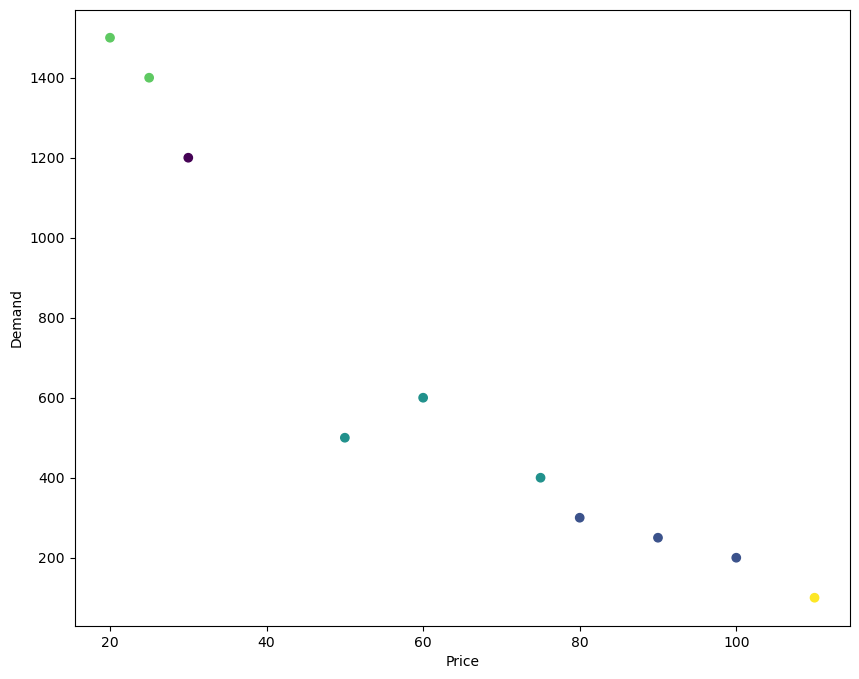

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(df['Price'],df['Demand'],c=df['cluster'],cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.show()

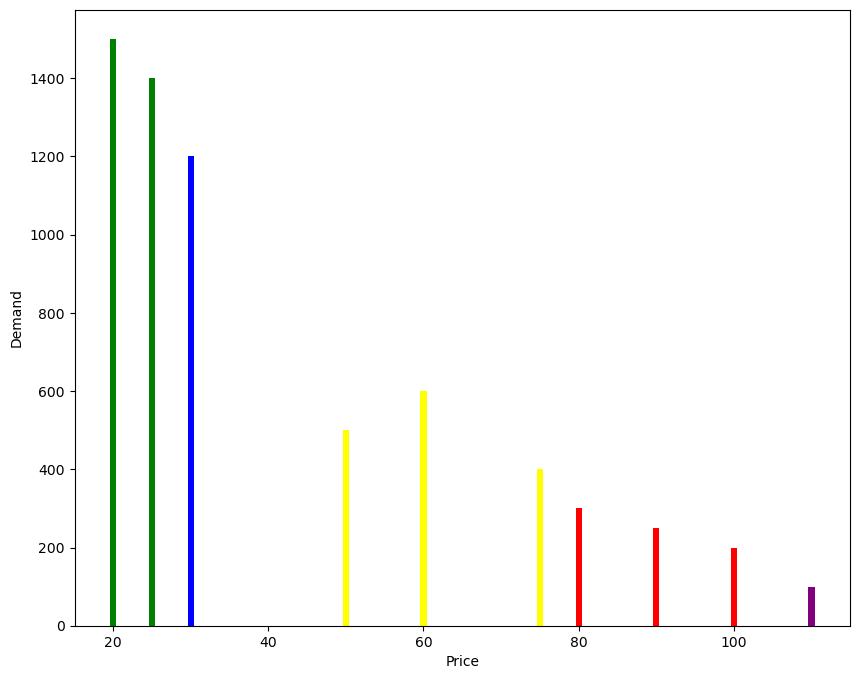

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(df['Price'],df['Demand'],color=df['cluster'].map({0:'blue',1:'red',2:'yellow',3:'green',4:'purple'}))
plt.xlabel('Price')
plt.ylabel('Demand')
plt.show()

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler=StandardScaler()

In [122]:
df_sclaed=scaler.fit_transform(df[['Price','Demand']])

In [123]:
df_scaled

array([[-1.09593941, -0.84356389],
       [-0.74241057, -0.69111259],
       [ 0.08249006, -0.43702708],
       [-1.3316253 , -0.89438099],
       [ 0.6717048 ,  0.32522945],
       [ 0.4360189 , -0.03049026],
       [-0.86025351, -0.79274679],
       [-0.27103878, -0.33539287],
       [ 1.26091953,  1.595657  ],
       [ 1.85013427,  2.10382802]])

In [124]:
from sklearn.cluster import DBSCAN

In [125]:
dbscan=DBSCAN(eps=1.5,min_samples=5)

In [126]:
df['cluster']=dbscan.fit_predict(df_scaled)

In [127]:
df

,Product,Price,Demand,cluster
0,Product A,50,500,0
1,Product B,20,1500,0
2,Product C,75,400,0
3,Product D,30,1200,0
4,Product E,100,200,0
5,Product F,80,300,0
6,Product G,25,1400,0
7,Product H,60,600,0
8,Product I,110,100,0
9,Product J,90,250,-1


In [128]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [129]:
linked=linkage(df_scaled,method='ward')

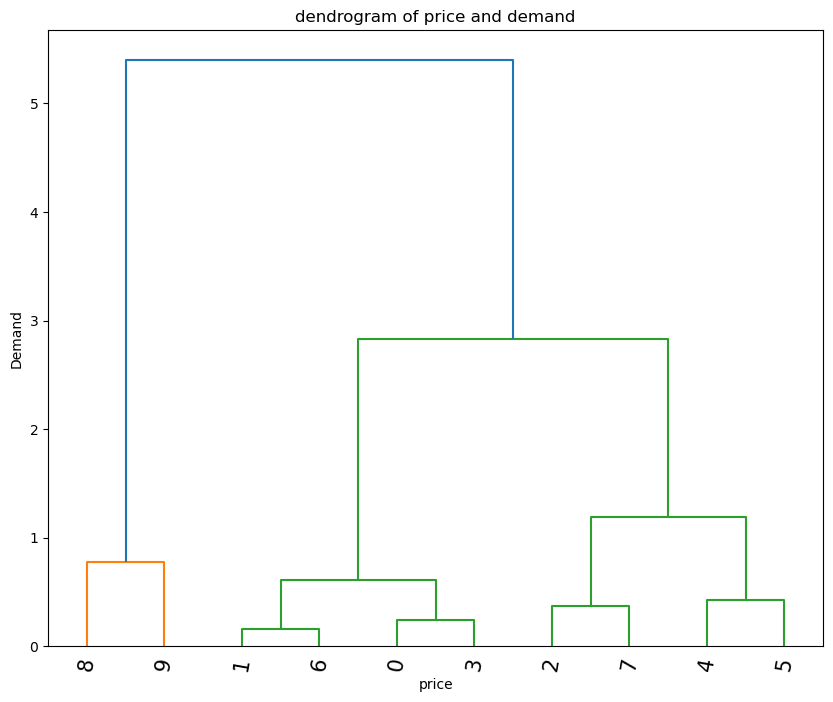

In [130]:
plt.figure(figsize=(10,8))
dendrogram(linked,labels=df.index,leaf_rotation=80,leaf_font_size=15)
plt.xlabel('price')
plt.ylabel('Demand')
plt.title('dendrogram of price and demand')
plt.show()

## 26-03-2025

In [1]:
# Clustering Online Shoppers Based on Browsing Behavior

import numpy as np
import pandas as pd

data = {
    'UserID': np.arange(1, 16),
    'Pages_Visited': np.random.randint(5, 50, 15),
    'Time_Spent': np.random.randint(1, 30, 15)
}
df = pd.DataFrame(data)
df

,UserID,Pages_Visited,Time_Spent
0,1,16,7
1,2,38,2
2,3,22,11
3,4,28,10
4,5,19,19
5,6,13,2
6,7,31,8
7,8,39,4
8,9,38,25
9,10,22,11


In [2]:
from sklearn.cluster import KMeans

In [3]:
model=KMeans(n_clusters=5,random_state=42)

In [4]:
df['cluster']=model.fit_predict(df[['Pages_Visited','Time_Spent']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
df

,UserID,Pages_Visited,Time_Spent,cluster
0,1,16,7,0
1,2,38,2,1
2,3,22,11,4
3,4,28,10,4
4,5,19,19,2
5,6,13,2,0
6,7,31,8,1
7,8,39,4,1
8,9,38,25,3
9,10,22,11,4


In [6]:
import matplotlib.pyplot as plt

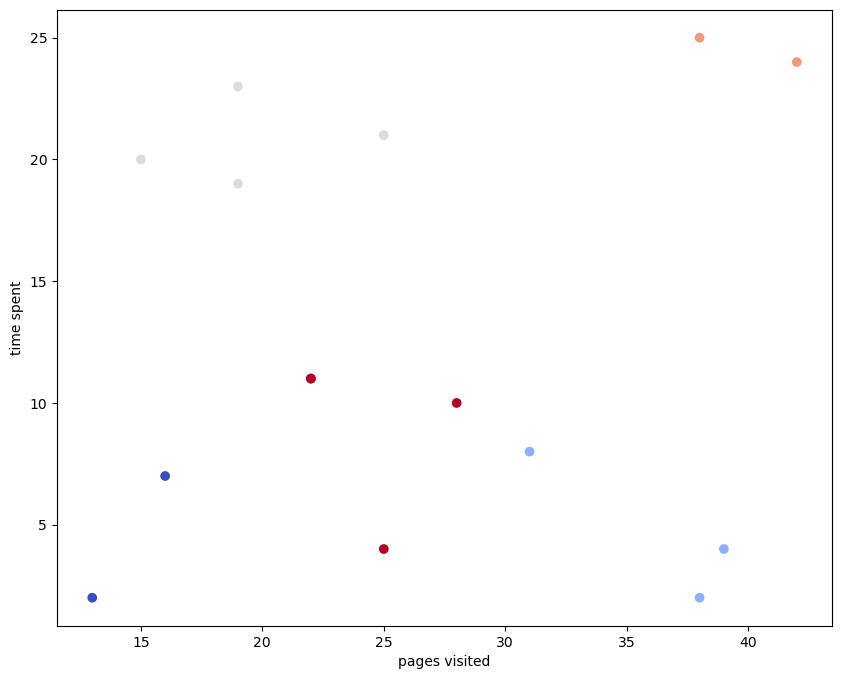

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(df['Pages_Visited'],df['Time_Spent'],c=df['cluster'],cmap='coolwarm')
plt.xlabel('pages visited')
plt.ylabel('time spent')
plt.show()

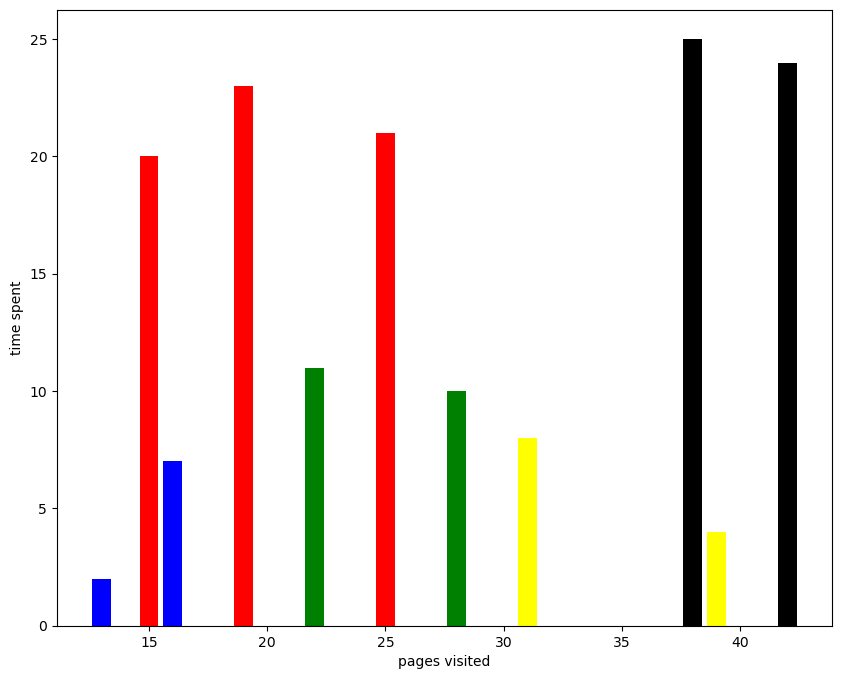

In [9]:
plt.figure(figsize=(10,8))
plt.bar(df['Pages_Visited'],df['Time_Spent'],color=df['cluster'].map({0:'blue',1:'yellow',2:'red',3:'black',4:'green'}))
plt.xlabel('pages visited')
plt.ylabel('time spent')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [13]:
df_scaled=scaler.fit_transform(df[['Pages_Visited','Time_Spent']])

In [14]:
from sklearn.cluster import DBSCAN

In [17]:
dbscan=DBSCAN(eps=1.4,min_samples=10)

In [18]:
df['cluster2']=dbscan.fit_predict(df_scaled)

In [19]:
df

,UserID,Pages_Visited,Time_Spent,cluster,cluster2
0,1,16,7,0,-1
1,2,38,2,1,-1
2,3,22,11,4,-1
3,4,28,10,4,-1
4,5,19,19,2,-1
5,6,13,2,0,-1
6,7,31,8,1,-1
7,8,39,4,1,-1
8,9,38,25,3,-1
9,10,22,11,4,-1


In [20]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [21]:
linked=linkage(df_scaled,method='ward')

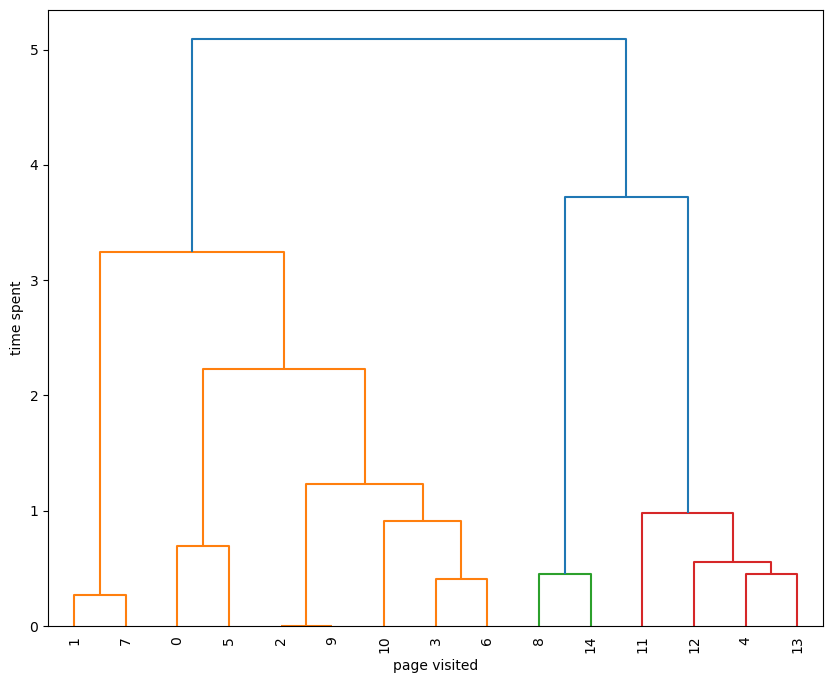

In [23]:
plt.figure(figsize=(10,8))
dendrogram(linked,labels=df.index,leaf_rotation=90,leaf_font_size=10)
plt.xlabel('page visited')
plt.ylabel('time spent')
plt.show()

In [24]:
# Customer Segmentation Based on Spending Patterns
import pandas as pd
import numpy as np
data = {
    'CustomerID': np.arange(1, 21),
    'Annual_Income': np.random.randint(20000, 120000, 20),
    'Spending_Score': np.random.randint(1, 100, 20)
}
df = pd.DataFrame(data)


In [25]:
df

,CustomerID,Annual_Income,Spending_Score
0,1,33190,41
1,2,52136,45
2,3,30668,41
3,4,65466,14
4,5,68673,47
5,6,97252,33
6,7,58717,59
7,8,91417,16
8,9,59223,6
9,10,119394,12


In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [34]:
df_scaled=scaler.fit_transform(df[['Annual_Income','Spending_Score']])

In [35]:
df_scaled

array([[-1.1991714 , -0.11610763],
       [-0.50571931,  0.04976041],
       [-1.29148039, -0.11610763],
       [-0.01782127, -1.23571694],
       [ 0.09955975,  0.13269444],
       [ 1.14559412, -0.44784372],
       [-0.26484482,  0.63029857],
       [ 0.93202435, -1.15278292],
       [-0.24632446, -1.56745303],
       [ 1.95602461, -1.31865096],
       [ 1.75826669, -0.86251384],
       [ 0.24391608,  1.4596388 ],
       [ 1.32977289,  2.08164397],
       [ 0.43863608, -0.48931073],
       [-0.60143225, -0.07464062],
       [-0.66782737, -0.11610763],
       [ 0.0033344 ,  1.37670478],
       [-1.40505486,  0.63029857],
       [-1.60833961,  1.54257282],
       [-0.09911321, -0.40637671]])

In [37]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [40]:
linked=linkage(df_scaled,method='ward')

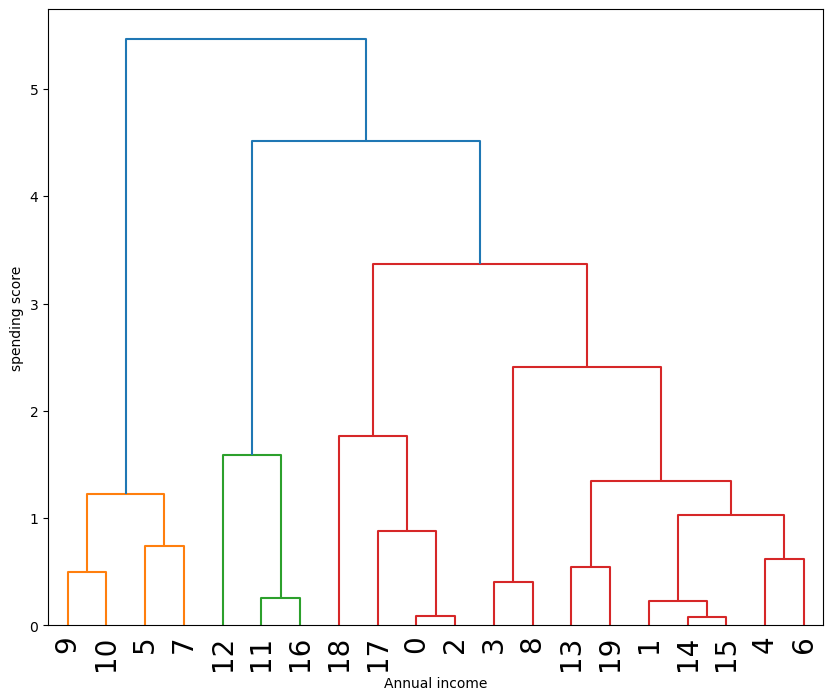

In [42]:
plt.figure(figsize=(10,8))
dendrogram(linked,leaf_rotation=90,leaf_font_size=20)
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.show()

In [43]:
model=DBSCAN (eps=1.5,min_samples=8)

In [44]:
df['cluster']=model.fit_predict(df[['Annual_Income','Spending_Score']])

In [45]:
df

,CustomerID,Annual_Income,Spending_Score,cluster
0,1,33190,41,-1
1,2,52136,45,-1
2,3,30668,41,-1
3,4,65466,14,-1
4,5,68673,47,-1
5,6,97252,33,-1
6,7,58717,59,-1
7,8,91417,16,-1
8,9,59223,6,-1
9,10,119394,12,-1


In [46]:
import matplotlib.pyplot as plt

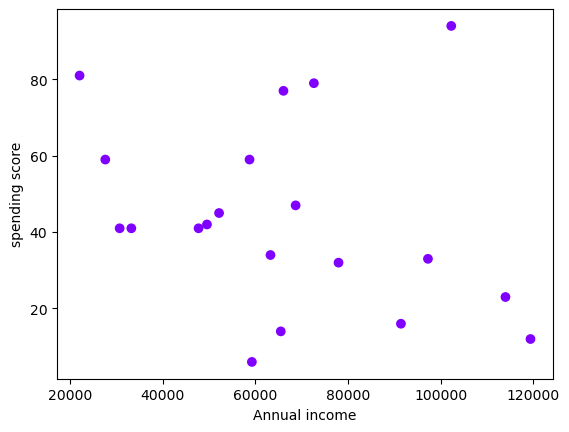

In [47]:
plt.scatter(df['Annual_Income'],df['Spending_Score'],c=df['cluster'],cmap='rainbow')
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.show()

In [48]:
# Clustering Cities Based on Weather Conditions

data = {
    'City': ['City A', 'City B', 'City C', 'City D', 'City E', 'City F', 'City G', 'City H', 'City I', 'City J'],
    'Temperature': [30, 25, 20, 35, 40, 10, 15, 38, 28, 22],
    'Humidity': [70, 65, 50, 80, 85, 40, 55, 88, 75, 60]
}
df = pd.DataFrame(data)
df

,City,Temperature,Humidity
0,City A,30,70
1,City B,25,65
2,City C,20,50
3,City D,35,80
4,City E,40,85
5,City F,10,40
6,City G,15,55
7,City H,38,88
8,City I,28,75
9,City J,22,60


In [49]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()

In [53]:
df_scaled=scaler.fit_transform(df[['Temperature','Humidity']])

In [54]:
df_scaled

array([[ 0.39665884,  0.21469258],
       [-0.13936662, -0.12076458],
       [-0.67539208, -1.12713607],
       [ 0.9326843 ,  0.88560691],
       [ 1.46870977,  1.22106408],
       [-1.74744301, -1.7980504 ],
       [-1.21141754, -0.79167891],
       [ 1.25429958,  1.42233838],
       [ 0.18224866,  0.55014975],
       [-0.4609819 , -0.45622174]])

In [55]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [56]:
linked=linkage(df_scaled,method='ward')

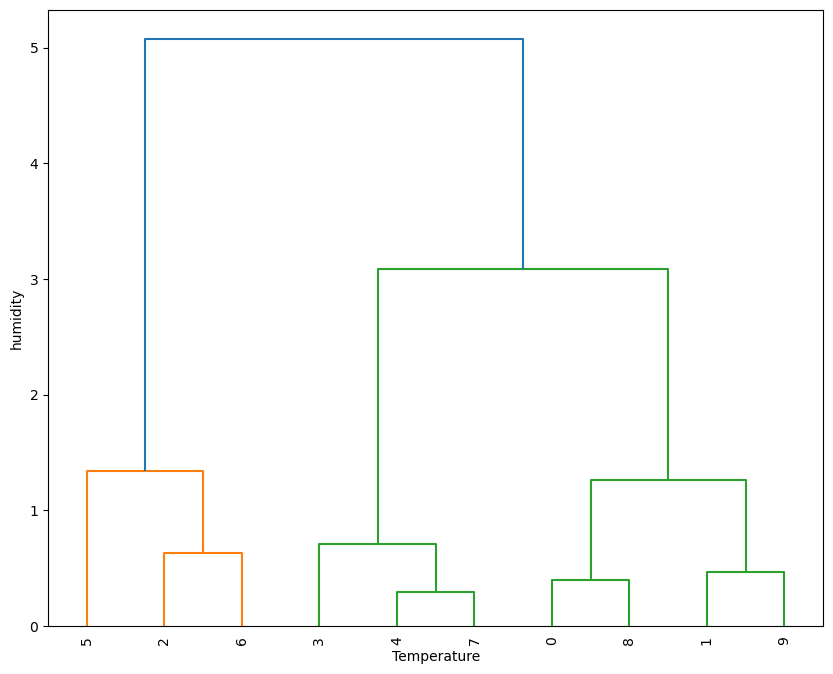

In [57]:
plt.figure(figsize=(10,8))
dendrogram(linked,labels=df.index,leaf_rotation=90,leaf_font_size=10,)
plt.xlabel('Temperature')
plt.ylabel('humidity')
plt.show()

In [58]:
# Clustering Social Media Influencers Based on Engagement
import pandas as pd
import numpy as np
data = {
    'Influencer': [f'Influencer {i}' for i in range(1, 11)],
    'Followers': np.random.randint(10000, 1000000, 10),
    'Avg_Likes': np.random.randint(100, 50000, 10)
}
df = pd.DataFrame(data)
df

,Influencer,Followers,Avg_Likes
0,Influencer 1,657322,14431
1,Influencer 2,889777,36399
2,Influencer 3,264608,18951
3,Influencer 4,615323,38611
4,Influencer 5,174033,16279
5,Influencer 6,400612,35572
6,Influencer 7,298878,21974
7,Influencer 8,254906,32743
8,Influencer 9,765440,37729
9,Influencer 10,955549,36468


In [59]:
from sklearn.cluster import DBSCAN

In [60]:
dbscan=DBSCAN(eps=1.5,min_samples=10)

In [61]:
df['cluster']=dbscan.fit_predict(df[['Followers','Avg_Likes']])

In [62]:
df

,Influencer,Followers,Avg_Likes,cluster
0,Influencer 1,657322,14431,-1
1,Influencer 2,889777,36399,-1
2,Influencer 3,264608,18951,-1
3,Influencer 4,615323,38611,-1
4,Influencer 5,174033,16279,-1
5,Influencer 6,400612,35572,-1
6,Influencer 7,298878,21974,-1
7,Influencer 8,254906,32743,-1
8,Influencer 9,765440,37729,-1
9,Influencer 10,955549,36468,-1


In [63]:
import matplotlib.pyplot as plt

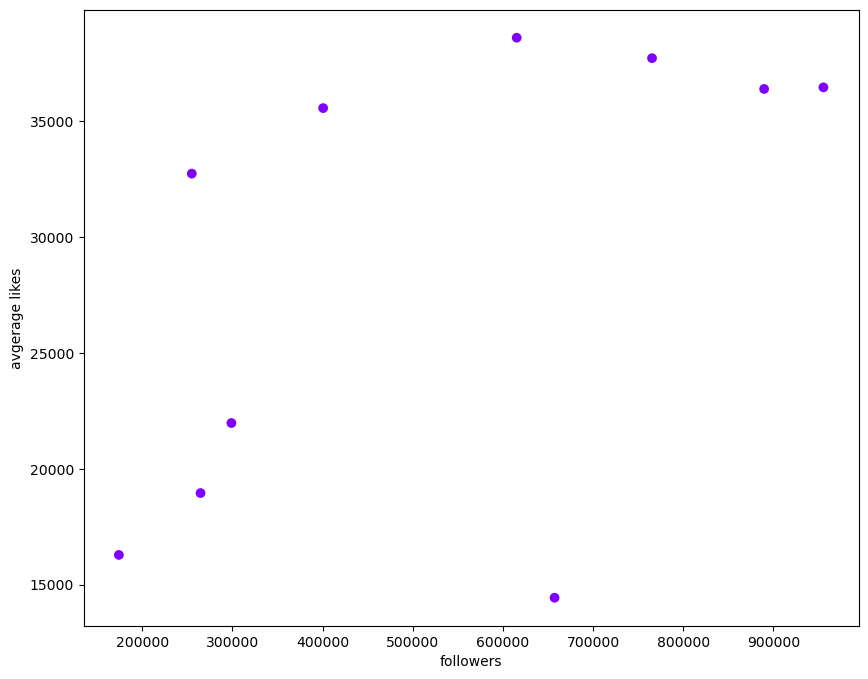

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(df['Followers'],df['Avg_Likes'],c=df['cluster'], cmap='rainbow')
plt.xlabel('followers')
plt.ylabel('avgerage likes')
plt.show()

In [68]:
# Clustering Patients Based on Health Metrics
import pandas as pd
import numpy as np
data = {
    'PatientID': np.arange(1, 16),
    'BMI': np.random.uniform(18, 35, 15),
    'Blood_Pressure': np.random.randint(90, 160, 15)
}
df = pd.DataFrame(data)
df

,PatientID,BMI,Blood_Pressure
0,1,29.676832,122
1,2,27.107300,123
2,3,26.832300,153
3,4,20.440000,159
4,5,33.717501,101
5,6,22.898387,108
6,7,18.121811,110
7,8,19.619547,159
8,9,30.024572,121
9,10,26.078291,137


In [69]:
from sklearn.cluster import KMeans

In [70]:
model=KMeans(n_clusters=5,random_state=42)

In [71]:
df['cluster']=model.fit_predict(df[['BMI','Blood_Pressure']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [72]:
df

,PatientID,BMI,Blood_Pressure,cluster
0,1,29.676832,122,2
1,2,27.107300,123,2
2,3,26.832300,153,1
3,4,20.440000,159,4
4,5,33.717501,101,0
5,6,22.898387,108,0
6,7,18.121811,110,0
7,8,19.619547,159,4
8,9,30.024572,121,2
9,10,26.078291,137,3


In [73]:
import matplotlib.pyplot as plt

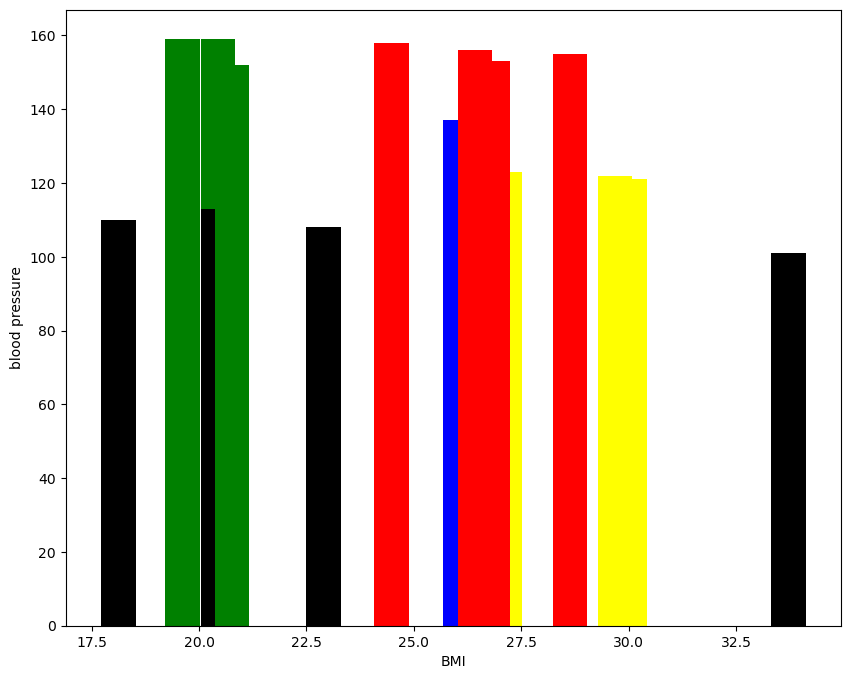

In [74]:
plt.figure(figsize=(10,8))
plt.bar(df['BMI'],df['Blood_Pressure'],color=df['cluster'].map({0:'black',1:'red',2:'yellow',3:'blue',4:'green'}))
plt.xlabel('BMI')
plt.ylabel('blood pressure')
plt.show()

## Decision Tree

In [75]:
import pandas as pd
import numpy as np

data = {
    'Monthly_Charges': np.random.randint(20, 100, 20),
    'Tenure': np.random.randint(1, 24, 20),
    'Contract': np.random.choice(['Month-to-Month', 'One Year', 'Two Year'], 20),
    'Churn': np.random.choice([0, 1], 20)  # 0 = No churn, 1 = Churn
}
df = pd.DataFrame(data)
df

,Monthly_Charges,Tenure,Contract,Churn
0,48,10,Month-to-Month,1
1,25,1,One Year,0
2,77,23,Two Year,0
3,70,5,Month-to-Month,1
4,22,4,One Year,1
5,81,10,Two Year,0
6,35,12,Month-to-Month,0
7,77,17,Month-to-Month,1
8,36,10,Two Year,1
9,45,22,One Year,0


In [76]:
df=pd.get_dummies(df,columns=['Contract'],drop_first=True)

In [77]:
df

,Monthly_Charges,Tenure,Churn,Contract_One Year,Contract_Two Year
0,48,10,1,False,False
1,25,1,0,True,False
2,77,23,0,False,True
3,70,5,1,False,False
4,22,4,1,True,False
5,81,10,0,False,True
6,35,12,0,False,False
7,77,17,1,False,False
8,36,10,1,False,True
9,45,22,0,True,False


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x=df.drop(columns=['Churn'])

In [80]:
x

,Monthly_Charges,Tenure,Contract_One Year,Contract_Two Year
0,48,10,False,False
1,25,1,True,False
2,77,23,False,True
3,70,5,False,False
4,22,4,True,False
5,81,10,False,True
6,35,12,False,False
7,77,17,False,False
8,36,10,False,True
9,45,22,True,False


In [81]:
y=df['Churn']

In [82]:
y

0     1
1     0
2     0
3     1
4     1
5     0
6     0
7     1
8     1
9     0
10    1
11    0
12    1
13    0
14    0
15    0
16    0
17    1
18    1
19    1
Name: Churn, dtype: int32

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
x_train

,Monthly_Charges,Tenure,Contract_One Year,Contract_Two Year
8,36,10,False,True
5,81,10,False,True
11,81,10,False,False
3,70,5,False,False
18,22,22,False,False
16,46,13,True,False
13,81,2,False,False
2,77,23,False,True
9,45,22,True,False
19,82,14,False,True


In [85]:
x_test

,Monthly_Charges,Tenure,Contract_One Year,Contract_Two Year
0,48,10,False,False
17,57,14,False,False
15,80,14,True,False
1,25,1,True,False


In [86]:
y_train

8     1
5     0
11    0
3     1
18    1
16    0
13    0
2     0
9     0
19    1
4     1
12    1
7     1
10    1
14    0
6     0
Name: Churn, dtype: int32

In [87]:
y_test

0     1
17    1
15    0
1     0
Name: Churn, dtype: int32

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [90]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [91]:
model.predict(x_test)

array([0, 0, 0, 1])

In [92]:
from sklearn.tree import plot_tree

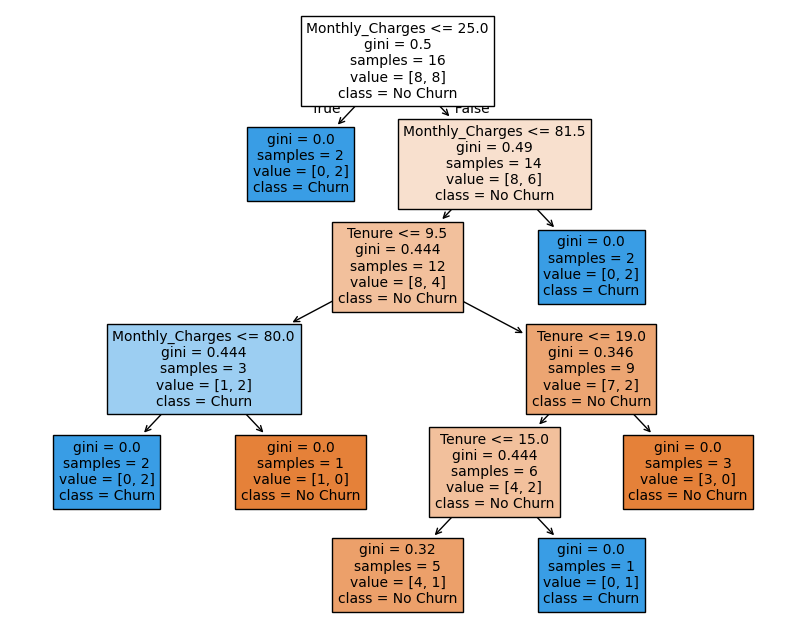

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plot_tree(model,feature_names=x.columns,class_names=['No Churn','Churn'],filled=True)
plt.show()

In [94]:
# Predict Loan Approval Using Decision Tree

import pandas as pd
import numpy as np
data = {
    'Credit_Score': np.random.randint(300, 850, 20),
    'Income': np.random.randint(20000, 100000, 20),
    'Loan_Amount': np.random.randint(5000, 50000, 20),
    'Approved': np.random.choice([0, 1], 20)  # 0 = Not Approved, 1 = Approved
}
df = pd.DataFrame(data)
df

,Credit_Score,Income,Loan_Amount,Approved
0,689,43313,21310,1
1,388,70774,13517,0
2,321,74143,37399,1
3,515,61465,41262,0
4,553,62741,8087,0
5,503,67957,44895,1
6,464,39118,41474,1
7,403,92687,36958,0
8,577,68970,35686,1
9,768,68146,6415,0


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x=df.drop(columns=['Approved'])
y=df['Approved']

In [97]:
x

,Credit_Score,Income,Loan_Amount
0,689,43313,21310
1,388,70774,13517
2,321,74143,37399
3,515,61465,41262
4,553,62741,8087
5,503,67957,44895
6,464,39118,41474
7,403,92687,36958
8,577,68970,35686
9,768,68146,6415


In [98]:
y

0     1
1     0
2     1
3     0
4     0
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    1
Name: Approved, dtype: int32

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
x_train

,Credit_Score,Income,Loan_Amount
8,577,68970,35686
5,503,67957,44895
11,577,63536,16390
3,515,61465,41262
18,749,42933,19659
16,323,74736,49003
13,820,58116,20817
2,321,74143,37399
9,768,68146,6415
19,362,71255,21951


In [101]:
x_test

,Credit_Score,Income,Loan_Amount
0,689,43313,21310
17,571,33627,16284
15,526,98369,14723
1,388,70774,13517


In [102]:
y_train

8     1
5     1
11    1
3     0
18    0
16    0
13    0
2     1
9     0
19    1
4     0
12    0
7     0
10    1
14    0
6     1
Name: Approved, dtype: int32

In [103]:
y_test

0     1
17    1
15    0
1     0
Name: Approved, dtype: int32

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [106]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [107]:
model.predict(x_test)

array([0, 1, 0, 1])

In [108]:
from sklearn.tree import plot_tree

In [109]:
import matplotlib.pyplot as plt

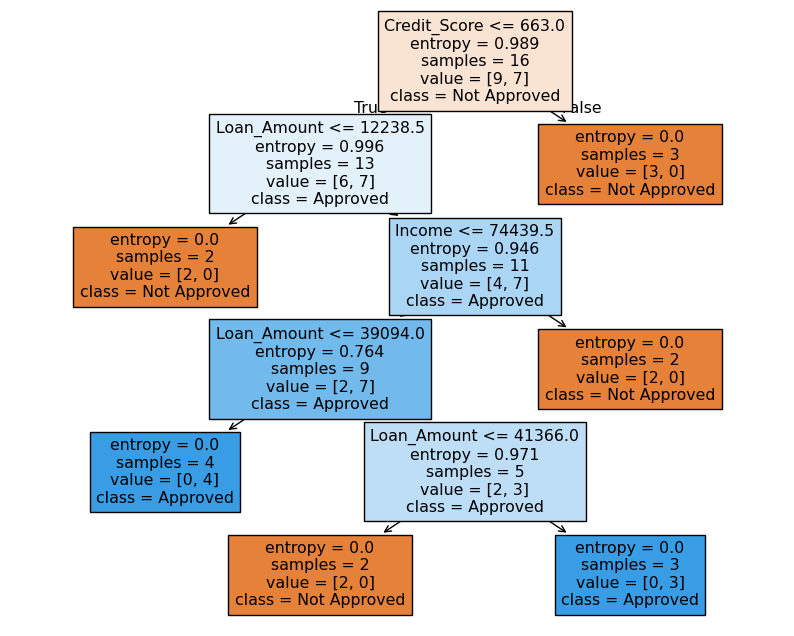

In [110]:
plt.figure(figsize=(10,8))
plot_tree(model,feature_names=x.columns,class_names=['Not Approved','Approved'],filled=True)
plt.show()

In [111]:
# Classifying Iris Flowers Using Decision Tree
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\91805\Downloads\Data science\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x=df.drop(columns='species')
y=df['species']

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [117]:
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [120]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [121]:
model.predict(x_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [122]:
from sklearn.tree import plot_tree

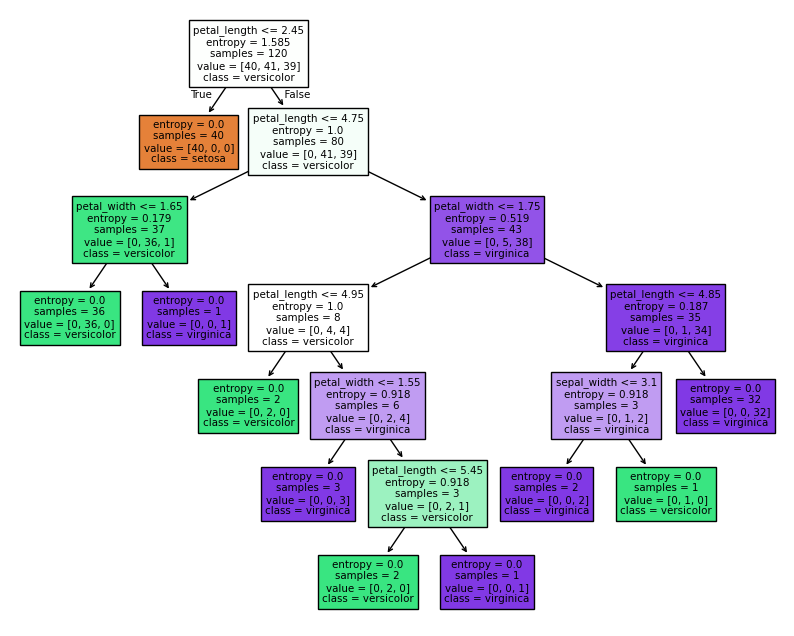

In [124]:
plt.figure(figsize=(10,8))
plot_tree(model,feature_names=x.columns,class_names=model.classes_.astype(str),filled=True)
plt.show()

In [125]:
# Regression - Predict House Prices Using Decision Tree

import pandas as pd
import numpy as np
data = {
    'Size_sqft': np.random.randint(500, 5000, 20),
    'Bedrooms': np.random.randint(1, 5, 20),
    'Bathrooms': np.random.randint(1, 3, 20),
    'Price': np.random.randint(50000, 500000, 20)
}
df = pd.DataFrame(data)
df

,Size_sqft,Bedrooms,Bathrooms,Price
0,4897,4,2,140963
1,2289,1,1,231358
2,4099,3,1,117979
3,1588,1,2,353739
4,2844,1,1,290671
5,2822,4,1,146811
6,1158,4,2,178071
7,2250,1,2,375465
8,4710,1,2,264283
9,880,1,1,227210


In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [129]:
x=df.drop(columns=['Price'])
y=df['Price']

In [130]:
x

,Size_sqft,Bedrooms,Bathrooms
0,4897,4,2
1,2289,1,1
2,4099,3,1
3,1588,1,2
4,2844,1,1
5,2822,4,1
6,1158,4,2
7,2250,1,2
8,4710,1,2
9,880,1,1


In [131]:
y

0     140963
1     231358
2     117979
3     353739
4     290671
5     146811
6     178071
7     375465
8     264283
9     227210
10    420106
11     94211
12    256448
13    278431
14    322166
15    478405
16    119053
17     89295
18    420452
19    433320
Name: Price, dtype: int32

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [133]:
x_train

,Size_sqft,Bedrooms,Bathrooms
8,4710,1,2
5,2822,4,1
11,4410,2,2
3,1588,1,2
18,4517,4,1
16,1689,2,2
13,3129,2,1
2,4099,3,1
9,880,1,1
19,3078,2,1


In [134]:
x_test

,Size_sqft,Bedrooms,Bathrooms
0,4897,4,2
17,4117,2,2
15,3007,3,1
1,2289,1,1


In [135]:
y_train

8     264283
5     146811
11     94211
3     353739
18    420452
16    119053
13    278431
2     117979
9     227210
19    433320
4     290671
12    256448
7     375465
10    420106
14    322166
6     178071
Name: Price, dtype: int32

In [136]:
y_test

0     140963
17     89295
15    478405
1     231358
Name: Price, dtype: int32

In [137]:
model=DecisionTreeRegressor(criterion='squared_error',max_depth=5,random_state=42)

In [138]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [139]:
model.predict(x_test)

array([264283. ,  94211. , 355405.5, 355405.5])

In [140]:
from sklearn.tree import plot_tree

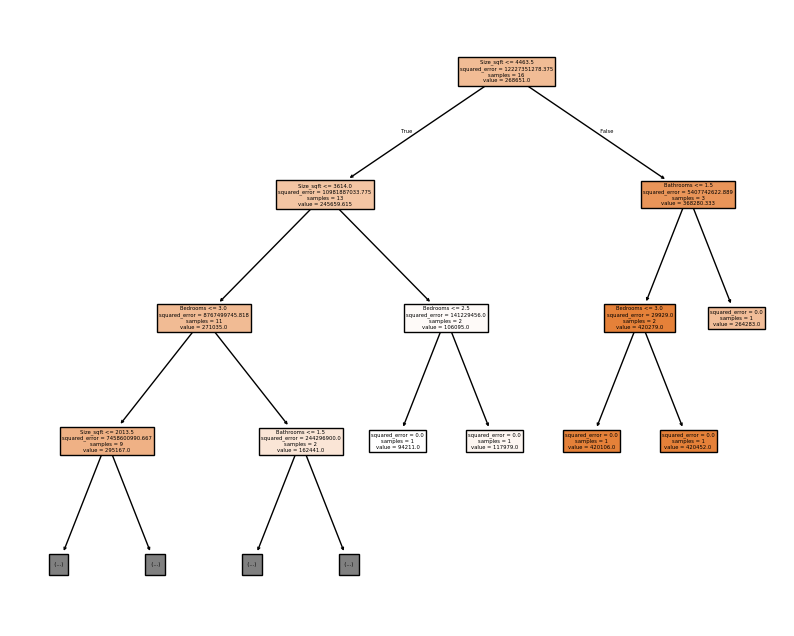

In [142]:
plt.figure(figsize=(10,8))
plot_tree(model,max_depth=3,feature_names=x.columns,filled=True)
plt.show()

In [144]:
# Feature Importance in Decision Tree

import pandas as pd
import numpy as np

data = {
    'Age': np.random.randint(18, 65, 20),
    'Salary': np.random.randint(30000, 120000, 20),
    'Education_Level': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], 20),
    'Purchased_Product': np.random.choice([0, 1], 20)  # 0 = No, 1 = Yes
}
df = pd.DataFrame(data)
df

,Age,Salary,Education_Level,Purchased_Product
0,58,67359,Masters,1
1,30,72007,Masters,1
2,43,86395,Masters,0
3,48,67069,PhD,0
4,39,60756,Bachelors,1
5,34,37709,Masters,1
6,20,36897,PhD,1
7,20,87975,Masters,0
8,47,63489,Masters,0
9,40,65672,Bachelors,1


In [145]:
df=pd.get_dummies(df,columns=['Education_Level'],drop_first=True)

In [146]:
df

,Age,Salary,Purchased_Product,Education_Level_High School,Education_Level_Masters,Education_Level_PhD
0,58,67359,1,False,True,False
1,30,72007,1,False,True,False
2,43,86395,0,False,True,False
3,48,67069,0,False,False,True
4,39,60756,1,False,False,False
5,34,37709,1,False,True,False
6,20,36897,1,False,False,True
7,20,87975,0,False,True,False
8,47,63489,0,False,True,False
9,40,65672,1,False,False,False


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x=df.drop(columns=['Purchased_Product'])
y=df['Purchased_Product']

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [154]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [155]:
model.predict(x_test)

array([0, 1, 0, 1])

In [156]:
from sklearn.tree import plot_tree

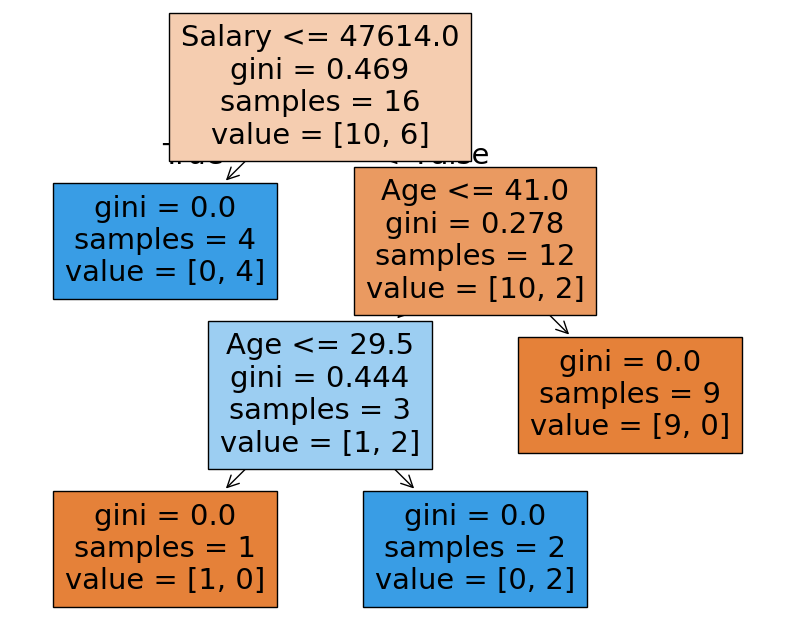

In [157]:
plt.figure(figsize=(10,8))
plot_tree(model,max_depth=3,feature_names=x.columns,filled=True)
plt.show()

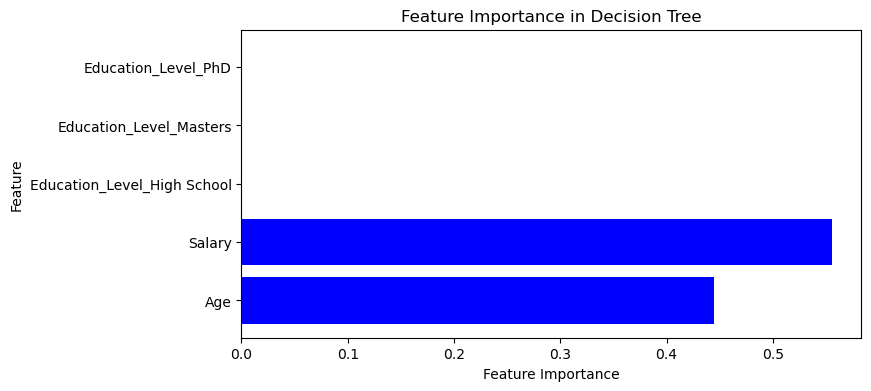

In [162]:
plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree")
plt.show()


In [163]:
#  Customer Segmentation Using Decision Trees

import pandas as pd
import numpy as np

data = {
    'Age': np.random.randint(18, 65, 50),
    'Income': np.random.randint(20000, 120000, 50),
    'Spending_Score': np.random.randint(1, 100, 50),
    'Segment': np.random.choice(['Low', 'Medium', 'High'], 50)
}
df = pd.DataFrame(data)
df

,Age,Income,Spending_Score,Segment
0,23,97389,61,Medium
1,63,106137,25,Low
2,43,76137,65,High
3,26,105196,44,High
4,49,80434,20,High
5,39,93264,63,Medium
6,36,61018,10,High
7,31,119117,4,Low
8,24,76753,10,Medium
9,53,23551,77,Medium


In [164]:
df=pd.get_dummies(df,columns=['Segment'],drop_first=True)

In [165]:
df

,Age,Income,Spending_Score,Segment_Low,Segment_Medium
0,23,97389,61,False,True
1,63,106137,25,True,False
2,43,76137,65,False,False
3,26,105196,44,False,False
4,49,80434,20,False,False
5,39,93264,63,False,True
6,36,61018,10,False,False
7,31,119117,4,True,False
8,24,76753,10,False,True
9,53,23551,77,False,True


In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x=df.drop(columns=['Segment_Low','Segment_Medium'])

In [168]:
x

,Age,Income,Spending_Score
0,23,97389,61
1,63,106137,25
2,43,76137,65
3,26,105196,44
4,49,80434,20
5,39,93264,63
6,36,61018,10
7,31,119117,4
8,24,76753,10
9,53,23551,77


In [170]:
y=df[['Segment_Low','Segment_Medium']]

In [171]:
y

,Segment_Low,Segment_Medium
0,False,True
1,True,False
2,False,False
3,False,False
4,False,False
5,False,True
6,False,False
7,True,False
8,False,True
9,False,True


In [172]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

In [179]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [180]:
model.predict(x_test)

array([0, 1, 0, 1])

In [181]:
from sklearn.tree import plot_tree

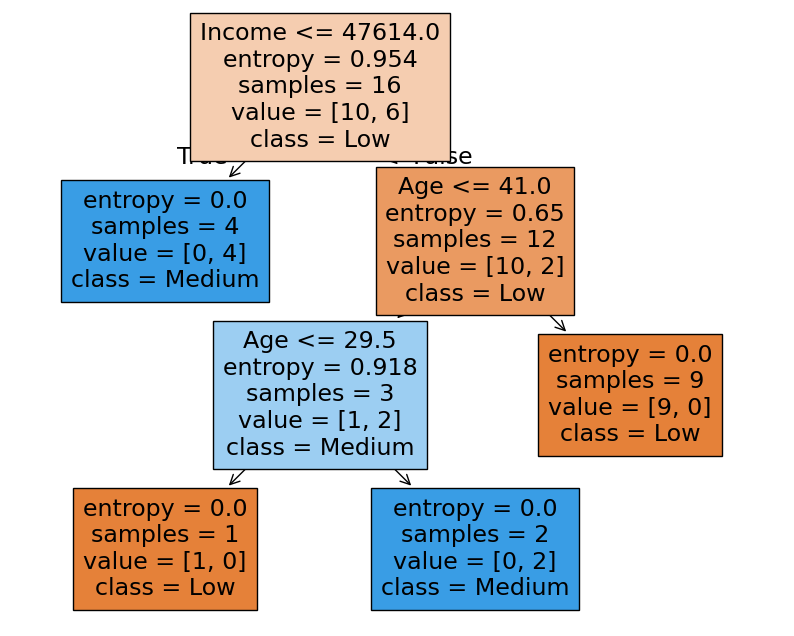

In [188]:
plt.figure(figsize=(10,8))
plot_tree(model, feature_names=x.columns,class_names=['Low','Medium','High'],filled=True)
plt.show()

In [189]:
# Predicting Loan Default Using Decision Tree

import pandas as pd
import numpy as np
data = {
    'Credit_Score': np.random.randint(300, 850, 50),
    'Loan_Amount': np.random.randint(5000, 50000, 50),
    'Annual_Income': np.random.randint(20000, 150000, 50),
    'Debt_to_Income': np.random.uniform(0.1, 0.5, 50),
    'Default': np.random.choice([0, 1], 50)  # 0 = No Default, 1 = Default
}
df = pd.DataFrame(data)
df

,Credit_Score,Loan_Amount,Annual_Income,Debt_to_Income,Default
0,468,20492,137604,0.113899,0
1,717,6704,65596,0.189048,0
2,611,27004,86407,0.437182,1
3,600,17233,43043,0.158706,1
4,550,44460,40225,0.297525,1
5,655,14328,105018,0.384017,0
6,302,32333,20255,0.324835,1
7,567,46531,62568,0.366138,1
8,467,37117,84755,0.420212,1
9,496,17857,67125,0.205422,0


In [190]:
from sklearn.model_selection import train_test_split

In [191]:
x=df.drop(columns=['Default'])
y=df['Default']

In [192]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [193]:
x_train

,Credit_Score,Loan_Amount,Annual_Income,Debt_to_Income
12,846,16193,33335,0.294119
4,550,44460,40225,0.297525
37,757,26601,117966,0.453126
8,467,37117,84755,0.420212
3,600,17233,43043,0.158706
6,302,32333,20255,0.324835
41,733,13555,24672,0.370382
46,544,49456,124346,0.388963
47,516,48683,99280,0.493076
15,661,20608,149347,0.217835


In [194]:
x_test

,Credit_Score,Loan_Amount,Annual_Income,Debt_to_Income
13,791,34204,77159,0.284066
39,781,30543,59400,0.294029
30,492,47821,54913,0.470906
45,600,6666,73158,0.393231
17,705,35548,113362,0.218286
48,749,42444,27582,0.159779
26,532,39198,29291,0.161014
25,609,22370,25506,0.228004
32,757,18539,127453,0.285033
19,609,7538,143109,0.471422


In [195]:
y_train

12    0
4     1
37    1
8     1
3     1
6     1
41    0
46    0
47    1
15    1
9     0
16    0
24    1
34    1
31    1
0     0
44    1
27    0
33    1
5     0
29    0
11    1
36    0
1     0
21    0
2     1
43    0
35    1
23    0
40    1
10    1
22    0
18    0
49    0
20    0
7     1
42    1
14    1
28    1
38    0
Name: Default, dtype: int32

In [196]:
y_test

13    0
39    0
30    1
45    0
17    0
48    0
26    1
25    0
32    1
19    0
Name: Default, dtype: int32

In [197]:
from sklearn.tree import DecisionTreeClassifier

In [199]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

In [200]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [201]:
model.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [202]:
from sklearn.tree import plot_tree

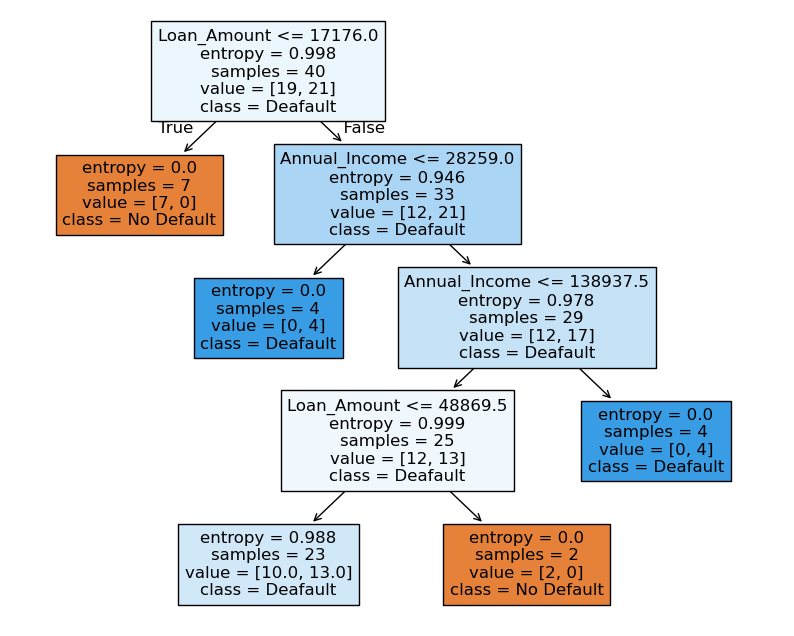

In [204]:
plt.figure(figsize=(10,8))
plot_tree(model,feature_names=x.columns,class_names=['No Default','Deafault'],filled=True)
plt.show()

## 27-03-2025

In [1]:
# Weather Prediction Using Decision Tree

import pandas as pd
import numpy as np

In [5]:
data = {
    'Temperature': np.random.randint(10, 40, 30),
    'Humidity': np.random.randint(20, 90, 30),
    'Wind_Speed': np.random.randint(0, 20, 30),
    'Weather': np.random.choice(['Sunny', 'Cloudy', 'Rainy'], 30)
}
df = pd.DataFrame(data)
df

,Temperature,Humidity,Wind_Speed,Weather
0,35,86,6,Sunny
1,26,68,18,Rainy
2,22,59,10,Rainy
3,36,51,16,Rainy
4,13,83,16,Rainy
5,34,73,17,Sunny
6,31,65,4,Rainy
7,26,30,17,Rainy
8,33,49,16,Cloudy
9,26,23,0,Rainy


In [6]:
df=pd.get_dummies(df,columns=['Weather'],drop_first=True)

In [7]:
df

,Temperature,Humidity,Wind_Speed,Weather_Rainy,Weather_Sunny
0,35,86,6,False,True
1,26,68,18,True,False
2,22,59,10,True,False
3,36,51,16,True,False
4,13,83,16,True,False
5,34,73,17,False,True
6,31,65,4,True,False
7,26,30,17,True,False
8,33,49,16,False,False
9,26,23,0,True,False


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x=df.drop(columns=['Weather_Rainy','Weather_Sunny'])
y=df[['Weather_Rainy','Weather_Sunny']]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42)

In [13]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [14]:
model.predict(x_test)

array([[ True, False],
       [False,  True],
       [False,  True],
       [False, False],
       [ True, False],
       [False, False]])

In [15]:
from sklearn.tree import plot_tree

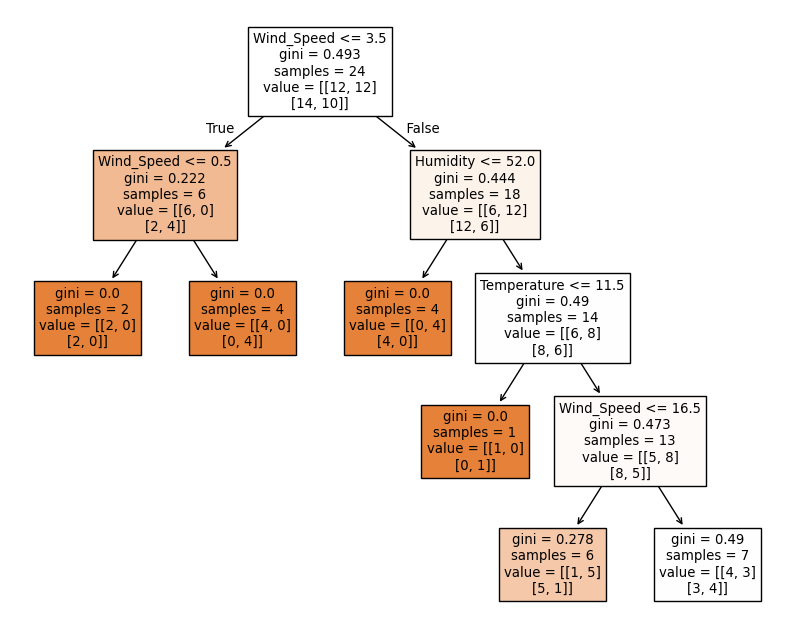

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plot_tree(model,feature_names=x.columns,class_names=['sunny','cloudy','rainy'],filled=True)
plt.show()

In [17]:
# Stock Market Trend Prediction Using Decision Tree

import pandas as pd
import numpy as np

In [18]:
data = {
    'Opening_Price': np.random.randint(100, 500, 30),
    'Closing_Price': np.random.randint(100, 500, 30),
    'Volume': np.random.randint(1000, 50000, 30),
    'Trend': np.random.choice(['Up', 'Down'], 30)
}
df = pd.DataFrame(data)
df

,Opening_Price,Closing_Price,Volume,Trend
0,306,442,38238,Down
1,412,130,8626,Down
2,468,411,18279,Up
3,111,489,31573,Up
4,461,111,32669,Down
5,170,385,17605,Up
6,357,346,7258,Down
7,440,322,19052,Up
8,309,155,10926,Down
9,447,228,37748,Up


In [19]:
df=pd.get_dummies(df,columns=['Trend'],drop_first=True)

In [20]:
df

,Opening_Price,Closing_Price,Volume,Trend_Up
0,306,442,38238,False
1,412,130,8626,False
2,468,411,18279,True
3,111,489,31573,True
4,461,111,32669,False
5,170,385,17605,True
6,357,346,7258,False
7,440,322,19052,True
8,309,155,10926,False
9,447,228,37748,True


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x=df.drop(columns=['Trend_Up'])
y=df['Trend_Up']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [26]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [27]:
model.predict(x_test)

array([ True, False, False, False, False, False])

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

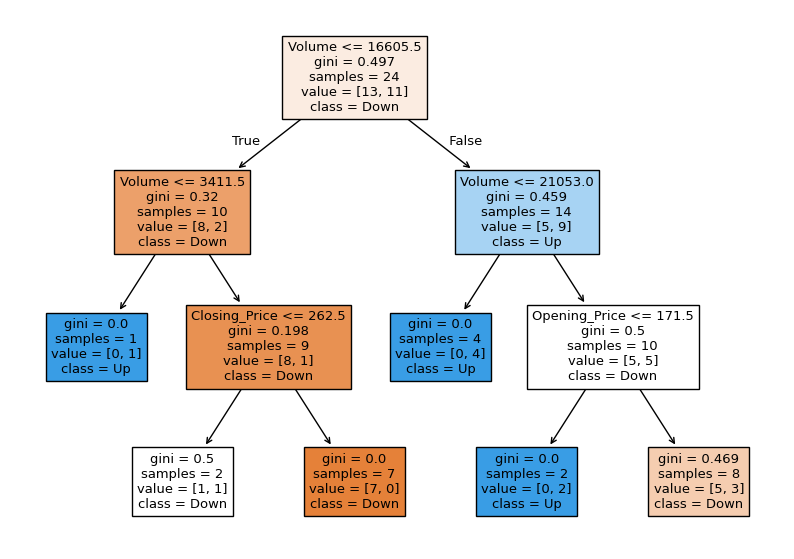

In [30]:
plt.figure(figsize=(10,7))
plot_tree(model,feature_names=x.columns,class_names=['Down','Up'],filled=True)
plt.show()

In [31]:
# Customer Purchase Behavior Prediction Using Decision Tree
import pandas as pd
import numpy as np
data = {
    'Age': np.random.randint(18, 65, 50),
    'Gender': np.random.choice(['Male', 'Female'], 50),
    'Income': np.random.randint(20000, 150000, 50),
    'Purchase': np.random.choice([0, 1], 50)  # 0 = No Purchase, 1 = Purchase
}
df = pd.DataFrame(data)
df

,Age,Gender,Income,Purchase
0,45,Male,90383,1
1,27,Male,21912,1
2,59,Male,23384,0
3,45,Female,60242,1
4,54,Female,32387,1
5,44,Female,121870,1
6,26,Female,34441,0
7,64,Female,127067,1
8,27,Male,114948,0
9,39,Male,25149,1


In [32]:
# Convert categorical column to numerical
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [33]:
df

,Age,Income,Purchase,Gender_Male
0,45,90383,1,True
1,27,21912,1,True
2,59,23384,0,True
3,45,60242,1,False
4,54,32387,1,False
5,44,121870,1,False
6,26,34441,0,False
7,64,127067,1,False
8,27,114948,0,True
9,39,25149,1,True


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x=df.drop(columns=['Gender_Male'])
y=df['Gender_Male']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [39]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
model.predict(x_test)

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [41]:
from sklearn.tree import plot_tree

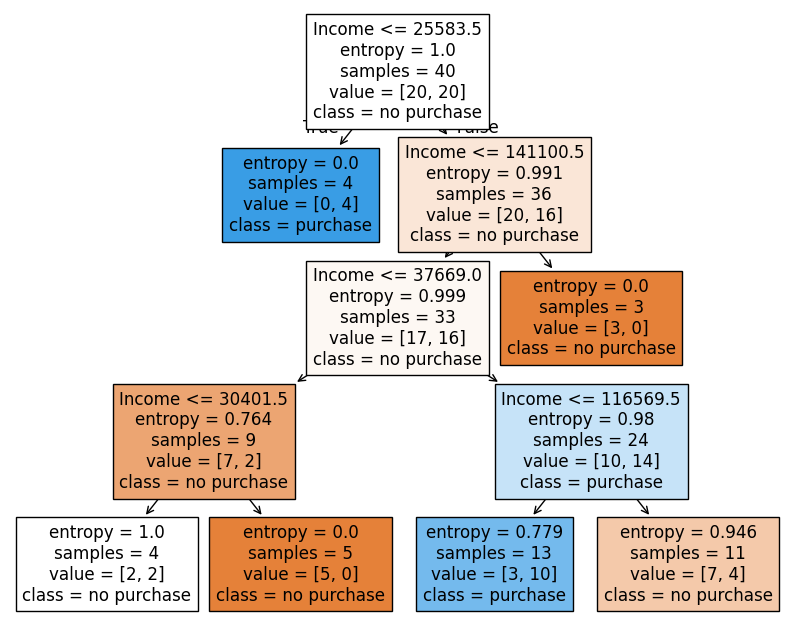

In [43]:
plt.figure(figsize=(10,8))
plot_tree(model,feature_names=x.columns,class_names=['no purchase','purchase'],filled=True)
plt.show()

## NAVIE BAYES ALGORITHMS

In [44]:
import pandas as pd
import numpy as np

In [45]:
data = {
    'Message': [
        'Congratulations! You won a lottery of $1 million',
        'Hey, let’s catch up for coffee tomorrow',
        'Get 50% off on your next purchase, limited time offer!',
        'Meeting at 3 PM in the office conference room',
        'Click here to claim your free gift now',
        'Hi, how are you doing today?'
    ],
    'Label': ['Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham']
}
df = pd.DataFrame(data)
df

,Message,Label
0,Congratulations! You won a lottery of $1 million,Spam
1,"Hey, let’s catch up for coffee tomorrow",Ham
2,"Get 50% off on your next purchase, limited tim...",Spam
3,Meeting at 3 PM in the office conference room,Ham
4,Click here to claim your free gift now,Spam
5,"Hi, how are you doing today?",Ham


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x=df['Message']
y=df['Label']

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [51]:
vector=CountVectorizer()

In [52]:
x_count=vector.fit_transform(x)

In [53]:
tfidf=TfidfTransformer()

In [54]:
x_tfidf=tfidf.fit_transform(x_count)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_tfidf,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.naive_bayes import MultinomialNB 

In [59]:
model=MultinomialNB(alpha=1.0)

In [60]:
model.fit(x_train,y_train)

MultinomialNB()

In [61]:
y_pred=model.predict(x_test)

In [62]:
y_pred

array(['Ham', 'Ham'], dtype='<U4')

In [64]:
from sklearn.metrics import classification_report ,accuracy_score,confusion_matrix

In [65]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [1, 0]], dtype=int64)

In [66]:
ac=accuracy_score(y_test,y_pred)
ac

0.5

In [67]:
cr=classification_report(y_test,y_pred)
cr

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n         Ham       0.50      1.00      0.67         1\n        Spam       0.00      0.00      0.00         1\n\n    accuracy                           0.50         2\n   macro avg       0.25      0.50      0.33         2\nweighted avg       0.25      0.50      0.33         2\n'

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
plt.figure(figure=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('confusion matrix')
plt.show()

RuntimeError: Can not put single artist in more than one figure

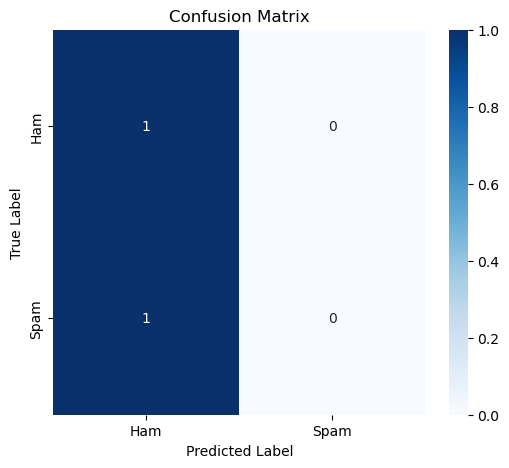

In [70]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()